# Netflix Business Case EDA

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Exploration of Data

In [2]:
df = pd.read_csv('netflix.csv')

In [3]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.tail(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [5]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
df.shape

(8807, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [9]:
df.describe(include='object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [10]:
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [11]:
df.sample()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7153,s7154,Movie,"Justice, My Foot!",Johnnie To,"Stephen Chow, Anita Mui, Carrie Ng, Wai Ai, Be...",Hong Kong,"August 31, 2018",1992,TV-14,95 min,"Action & Adventure, Comedies, International Mo...",Slick lawyer Sung fears he's been cursed with ...


In [12]:
df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


In [13]:
df[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


## Data Wrangling

### Unnesting the columns (directors , casts , countrys , listed_in)

In [14]:
unnesting = ['director','cast','country','listed_in']

for column in unnesting:
    df[column] = df[column].str.split(',')
    df = df.explode(column)

In [15]:
df.shape

(202065, 12)

In [16]:
df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


In [17]:
df.reset_index(drop=True,inplace=True)

In [18]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
202060,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...
202061,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...
202062,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...
202063,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...


In [19]:
df.nunique()

,0
show_id,8807
type,2
title,8807
director,5120
cast,39296
country,197
date_added,1767
release_year,74
rating,17
duration,220


### Treating Nulls

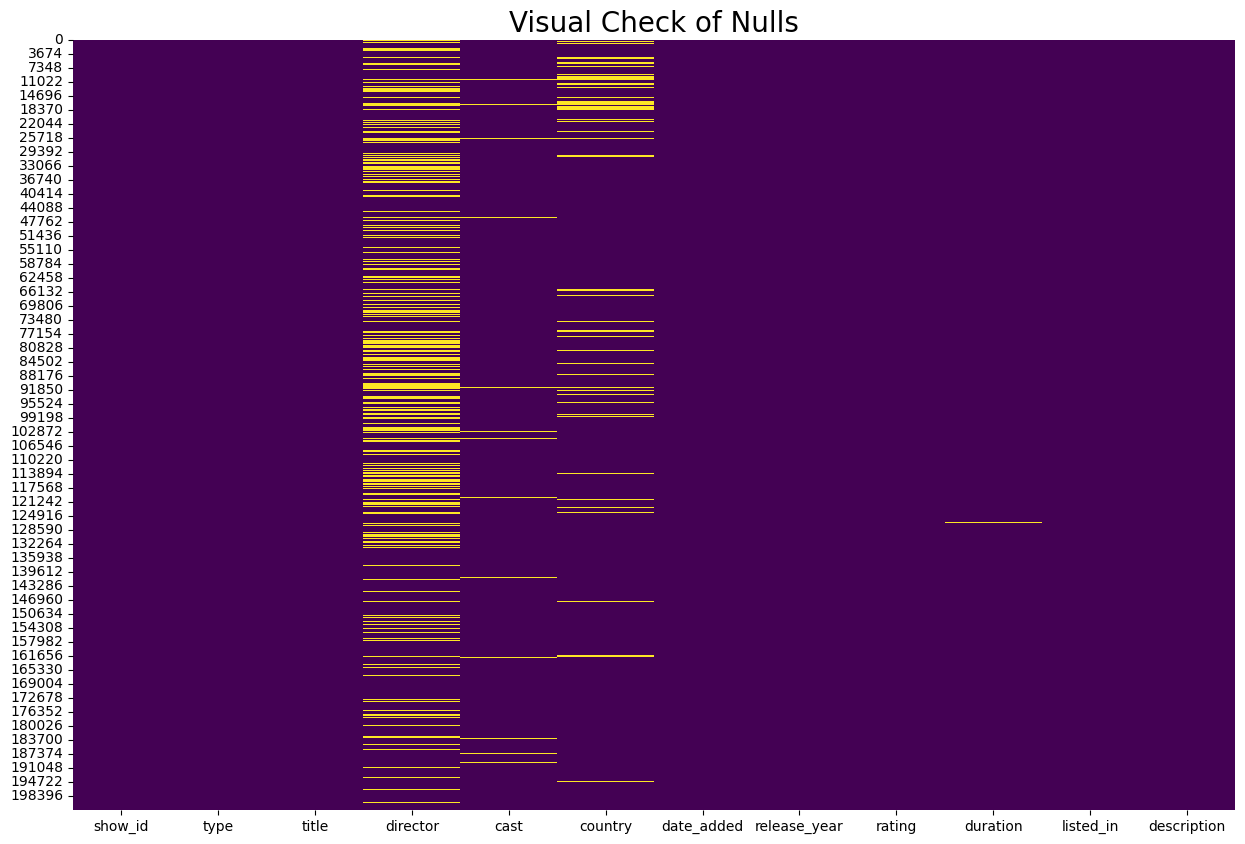

In [20]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')
plt.title('Visual Check of Nulls',fontsize=20)
plt.show()

In [21]:
df.isna().sum().sort_values(ascending=False)

,0
director,50643
country,11897
cast,2149
date_added,158
rating,67
duration,3
show_id,0
type,0
title,0
release_year,0


In [22]:
for i in df.columns:
    null_pct = (df[i].isna().sum() / df.shape[0]) *100
    if null_pct > 0 :
        print(f'Null_pct of {i} is {round(null_pct,3)} %')

Null_pct of director is 25.063 %
Null_pct of cast is 1.064 %
Null_pct of country is 5.888 %
Null_pct of date_added is 0.078 %
Null_pct of rating is 0.033 %
Null_pct of duration is 0.001 %


In [23]:
df[df.date_added.isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
136940,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,Daniel Radcliffe,United Kingdom,NaN,2013,TV-MA,2 Seasons,British TV Shows,"Set during the Russian Revolution, this comic ..."
136941,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,Daniel Radcliffe,United Kingdom,NaN,2013,TV-MA,2 Seasons,TV Comedies,"Set during the Russian Revolution, this comic ..."
136942,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,Daniel Radcliffe,United Kingdom,NaN,2013,TV-MA,2 Seasons,TV Dramas,"Set during the Russian Revolution, this comic ..."
136943,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,Jon Hamm,United Kingdom,NaN,2013,TV-MA,2 Seasons,British TV Shows,"Set during the Russian Revolution, this comic ..."
136944,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,Jon Hamm,United Kingdom,NaN,2013,TV-MA,2 Seasons,TV Comedies,"Set during the Russian Revolution, this comic ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
186965,s8183,TV Show,The Adventures of Figaro Pho,NaN,Charlotte Hamlyn,Australia,NaN,2015,TV-Y7,2 Seasons,TV Comedies,"Imagine your worst fears, then multiply them: ..."
186966,s8183,TV Show,The Adventures of Figaro Pho,NaN,Stavroula Mountzouris,Australia,NaN,2015,TV-Y7,2 Seasons,Kids' TV,"Imagine your worst fears, then multiply them: ..."
186967,s8183,TV Show,The Adventures of Figaro Pho,NaN,Stavroula Mountzouris,Australia,NaN,2015,TV-Y7,2 Seasons,TV Comedies,"Imagine your worst fears, then multiply them: ..."
186968,s8183,TV Show,The Adventures of Figaro Pho,NaN,Aletheia Burney,Australia,NaN,2015,TV-Y7,2 Seasons,Kids' TV,"Imagine your worst fears, then multiply them: ..."


In [24]:
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')

In [25]:
df['date_added'].fillna(df['date_added'].mode()[0],inplace=True)

In [26]:
df.isna().sum().sort_values(ascending=False)

,0
director,50643
country,11897
cast,2149
rating,67
duration,3
title,0
show_id,0
type,0
release_year,0
date_added,0


In [27]:
df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,datetime64[ns]
release_year,int64
rating,object
duration,object


In [28]:
df['year_added'] = df['date_added'].dt.year

In [29]:
df.sample()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
38102,s1569,Movie,"Kalel, 15",Jun Lana,Sue Prado,Philippines,2020-12-09,2019,TV-MA,105 min,Independent Movies,"Surrounded by tensions and secrets, a teenage ...",2020


In [30]:
df[df.rating.isna() | df.duration.isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
126582,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi...",2017
131648,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...,2016
131782,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...,2016
135172,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Oprah Winfrey,NaN,2017-01-26,2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...,2017
135173,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Ava DuVernay,NaN,2017-01-26,2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172016,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,Francesco Migliore,Italy,2017-03-01,2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c...",2017
172017,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,Albrecht Weimer,Italy,2017-03-01,2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c...",2017
172018,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,Giulia Dichiaro,Italy,2017-03-01,2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c...",2017
172019,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,Alessandra Oriti Niosi,Italy,2017-03-01,2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c...",2017


In [31]:
df["country"].fillna("Unknown",inplace=True)
df["cast"].fillna("Unknown actors",inplace=True)
df["director"].fillna("Unknown director",inplace=True)
df["rating"].fillna("Unknown",inplace=True)

In [32]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,3


In [33]:
df[df.duration.isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
126582,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi...",2017
131648,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...,2016
131782,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...,2016


In [34]:
mask = df['director'] == 'Louis C.K.'
df.loc[mask, 'duration'] = df.loc[mask, 'duration'].fillna(df.loc[mask, 'rating'])


In [35]:
df.loc[df['director'] == 'Louis C.K.', 'rating'] = 'Unknown'

In [36]:
df[df.director=='Louis C.K.']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
126582,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,Unknown,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi...",2017
131648,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,Unknown,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...,2016
131782,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,Unknown,66 min,Movies,The comic puts his trademark hilarious/thought...,2016


In [37]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


## Data Segregation

In [38]:
df['type'].value_counts()

,count
type,
Movie,145917
TV Show,56148


In [39]:
movies_data = df[df['type'] == 'Movie']
tvshows_data = df[df['type'] == 'TV Show']

In [40]:
movies_data.shape , tvshows_data.shape

((145917, 13), (56148, 13))

In [41]:
movies_data['runtime_in_mins'] = movies_data['duration'].str.split(' ').str[0]
tvshows_data['no_of_seasons'] = tvshows_data['duration'].str.split(' ').str[0]

In [42]:
movies_data['runtime_in_mins'] = movies_data['runtime_in_mins'].astype(int)
tvshows_data['no_of_seasons'] = tvshows_data['no_of_seasons'].astype(int)

In [43]:
movies_data = movies_data.drop(columns=['description', 'duration']).reset_index(drop=True)
tvshows_data = tvshows_data.drop(columns=['description', 'duration']).reset_index(drop=True)

In [44]:
movies_data.sample()

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,year_added,runtime_in_mins
135290,s8300,Movie,The First Line,Coerte Voorhees,Paul Freeman,United States,2016-09-20,2014,TV-14,Dramas,2016,87


In [45]:
tvshows_data.sample()

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,year_added,no_of_seasons
41034,s5100,TV Show,The Frozen Dead,Unknown director,Pascal Greggory,France,2018-01-01,2017,TV-MA,TV Dramas,2018,1


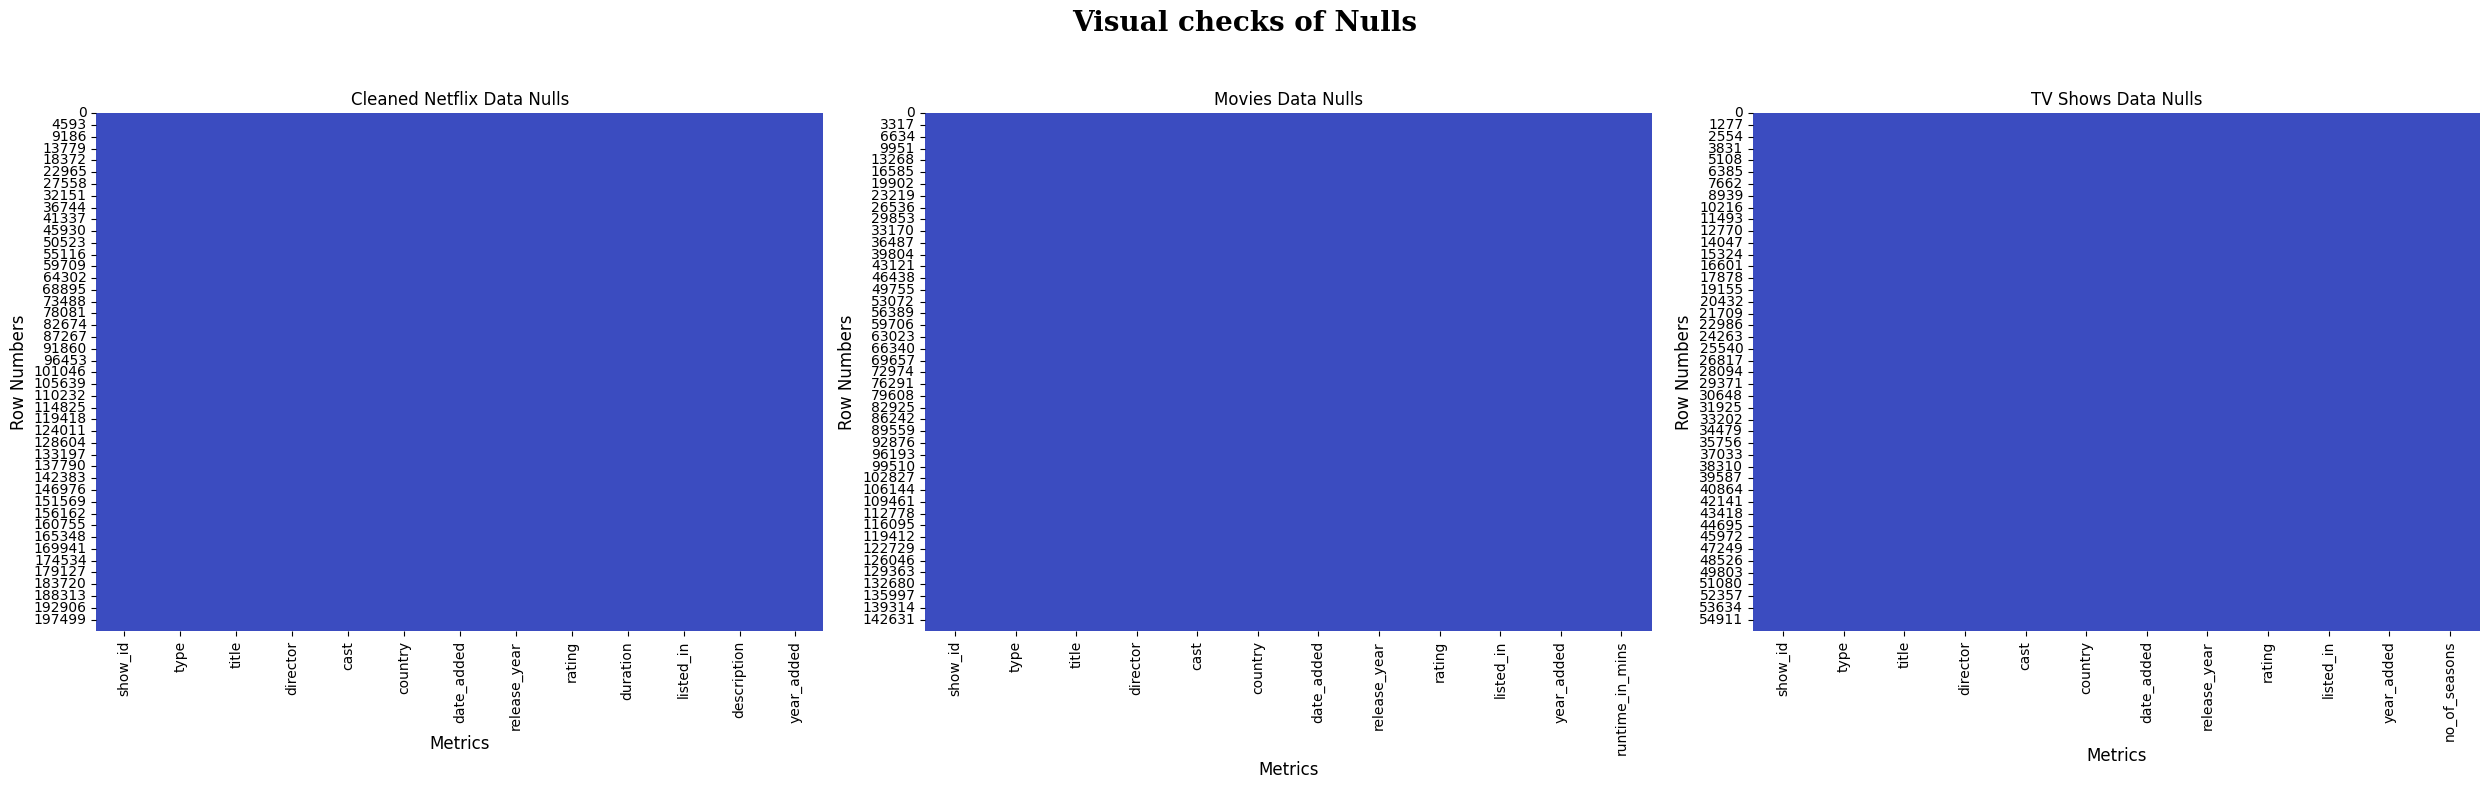

In [46]:
fig = plt.figure(figsize=(25, 8))
fig.suptitle('Visual checks of Nulls', fontsize=20, fontweight="bold", fontfamily='serif')

plt.subplot(1, 3, 1)
sns.heatmap(df.isnull(), cmap="coolwarm", cbar=False)
plt.title('Cleaned Netflix Data Nulls', fontsize=12)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Row Numbers', fontsize=12)

plt.subplot(1, 3, 2)
sns.heatmap(movies_data.isnull(), cmap="coolwarm", cbar=False)
plt.title('Movies Data Nulls', fontsize=12)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Row Numbers', fontsize=12)

plt.subplot(1, 3, 3)
sns.heatmap(tvshows_data.isnull(), cmap="coolwarm", cbar=False)
plt.title('TV Shows Data Nulls', fontsize=12)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Row Numbers', fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [47]:
# Save DataFrames to CSV files with proper formatting

df.to_csv('netflix_cleaned_data.csv', index=False)
movies_data.to_csv('cleaned_movies_data.csv', index=False)
tvshows_data.to_csv('cleaned_tvshows_data.csv', index=False)

## Exploratory Data Analysis (EDA):

In [48]:
nx = pd.read_csv('netflix_cleaned_data.csv')
md = pd.read_csv('cleaned_movies_data.csv')
tvd = pd.read_csv('cleaned_tvshows_data.csv')


####  📌 Q. How is content distributed based on ratings on Netflix?

In [49]:
rvc = df['rating'].value_counts()
rvc

,count
rating,
TV-MA,73915
TV-14,43957
R,25860
PG-13,16246
TV-PG,14926
PG,10919
TV-Y7,6304
TV-Y,3665
TV-G,2779


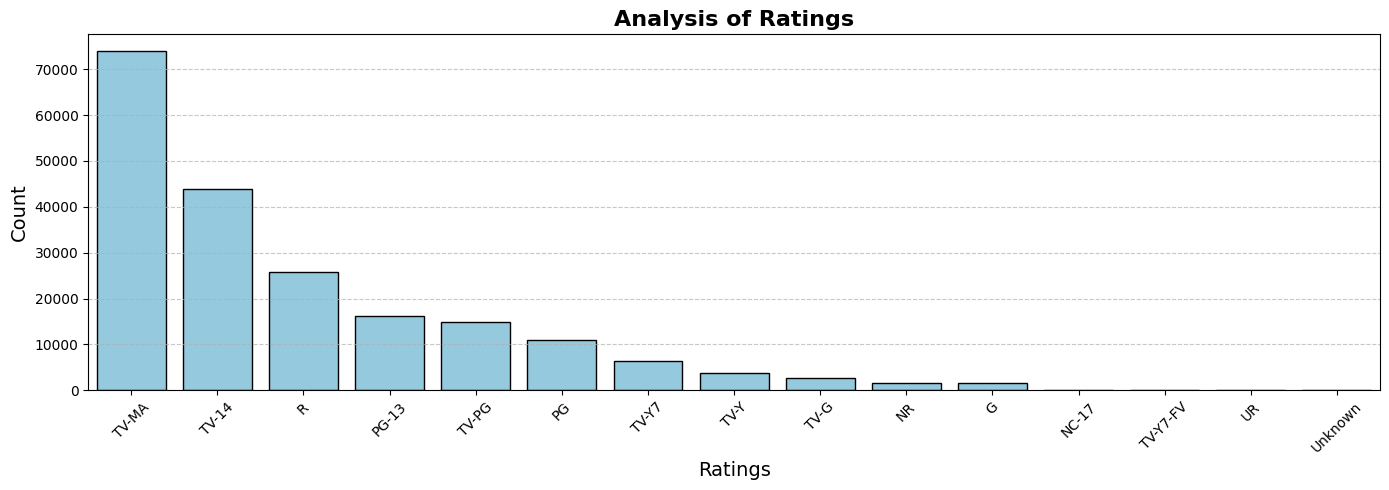

In [50]:
plt.figure(figsize=(14, 5))

sns.barplot(x=rvc.index, y=rvc.values, color='skyblue', edgecolor='black' )

plt.title('Analysis of Ratings', fontsize=16, fontweight='bold')
plt.xlabel('Ratings', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


#### 👉Insights :

- While Netflix does offer family-friendly movies and shows, they prioritize content for mature and teenage audiences as majority of content falls under `TV-MA` and `TV-14`.
--------------------------------

#### 📌Q. How are contents distributed in Netflix Platform ?

In [51]:
pg = df.groupby('type')['show_id'].nunique()
pg

,show_id
type,
Movie,6131
TV Show,2676


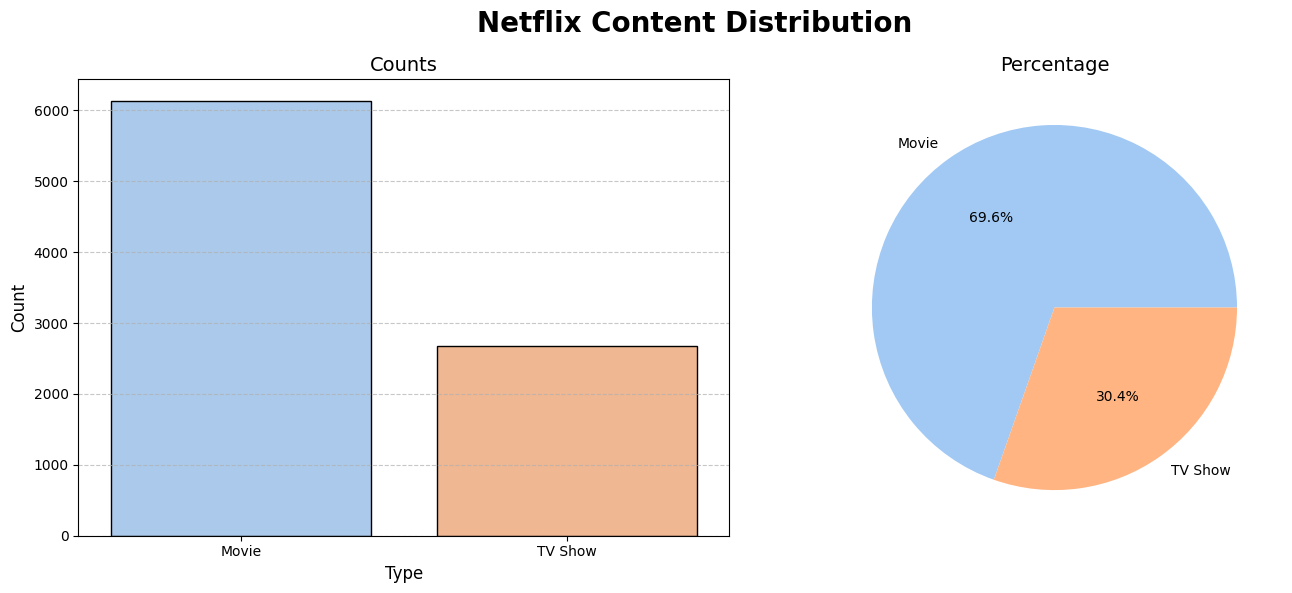

In [52]:
plt.figure(figsize=(14, 6))
font = {'weight':'bold',
        'family':'serif'}
plt.suptitle("Netflix Content Distribution", fontweight='bold', fontsize=20)

plt.subplot(1, 2, 1)
ax = sns.barplot(x=pg.index, y=pg.values, palette="pastel", edgecolor='black')

plt.title('Counts', fontsize=14)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
plt.pie(pg, labels=pg.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title('Percentage', fontsize=14)

plt.tight_layout()
plt.show()


#### 👉Insights :

- we can clearly interpret that nearly *70%* contents are `Movies` whereas *30%* are `Tvshows` contents in Netflix content library.
--------------------------------


#### 📌Q. What are the top 15 countries producing the most Movies and TV Shows on Netflix?

In [53]:
# Clean the 'country' column before grouping
md['country'] = md['country'].str.strip().str.title()  # Strip spaces and title-case

# countries consumption of movies
cm = md.groupby('country')['show_id'].nunique().sort_values(ascending=False)[:15]
cmdf = cm[cm.index != 'Unknown']
cmdf

,show_id
country,
United States,2752
India,962
United Kingdom,534
Canada,319
France,303
Germany,182
Spain,171
Japan,119
China,114


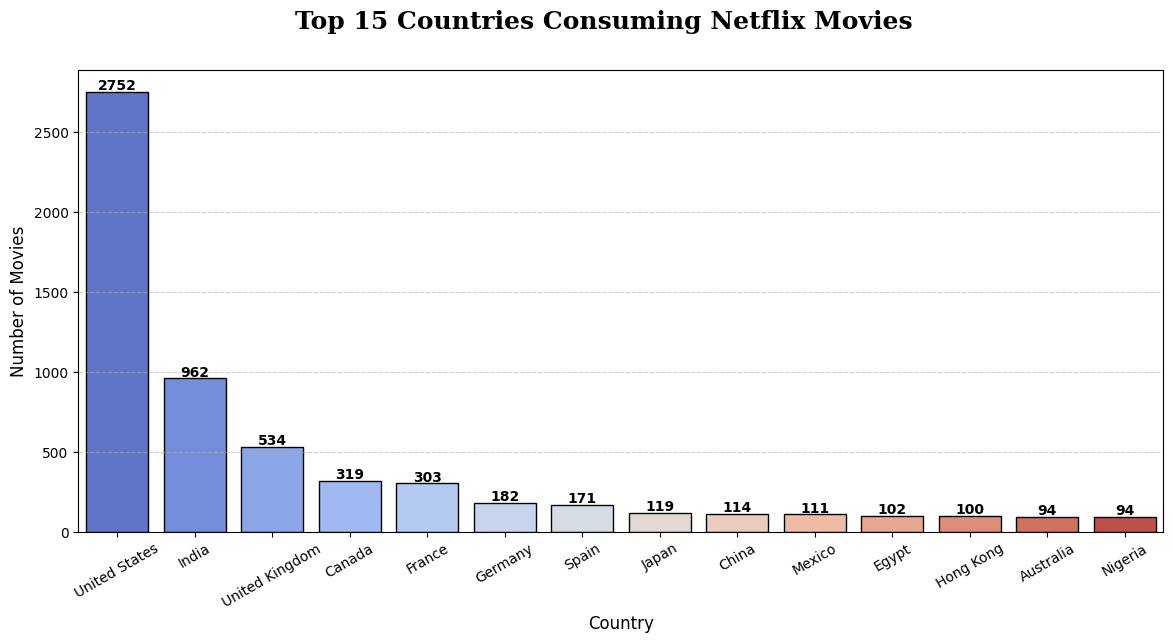

In [54]:
plt.figure(figsize=(14, 6))
plt.suptitle('Top 15 Countries Consuming Netflix Movies',
             fontsize=18, fontweight="bold", fontfamily='serif')

# Access the values of the 'show_id' column directly for the y-axis
sns.barplot(x=cmdf.index, y=cmdf.values, palette="coolwarm", edgecolor='black')

plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.6)

for i, value in enumerate(cmdf.values): # iterate through the show_id column
    plt.text(i, value + 10, str(value), ha='center', fontsize=10, fontweight="bold")

plt.show()

In [55]:
# Clean the 'country' column before grouping
tvd['country'] = tvd['country'].str.strip().str.title()  # Strip spaces and title-case

# countries consumption of tv shows
ctv =tvd.groupby('country')['show_id'].nunique().sort_values(ascending=False)[:15]
ctvdf = ctv[ctv.index != 'Unknown']
ctvdf

,show_id
country,
United States,938
United Kingdom,272
Japan,199
South Korea,170
Canada,126
France,90
India,84
Taiwan,70
Australia,66


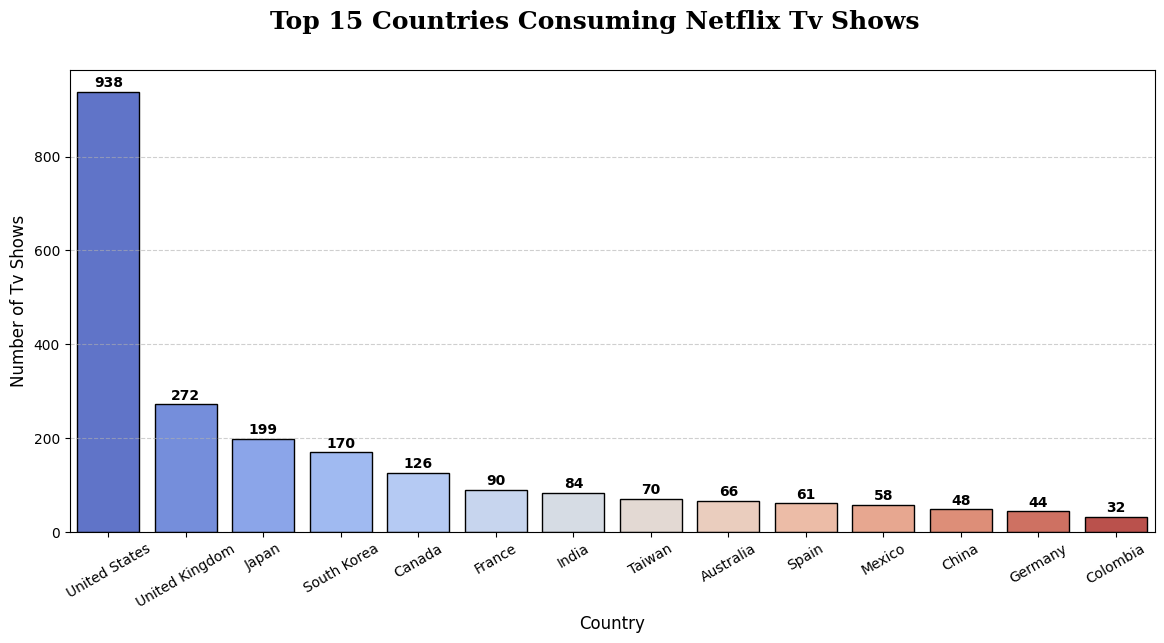

In [56]:
plt.figure(figsize=(14, 6))
plt.suptitle('Top 15 Countries Consuming Netflix Tv Shows',
             fontsize=18, fontweight="bold", fontfamily='serif')

# Access the values of the 'show_id' column directly for the y-axis
sns.barplot(x=ctvdf.index, y=ctvdf.values, palette="coolwarm", edgecolor='black')

plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Tv Shows', fontsize=12)
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.6)

for i, value in enumerate(ctvdf.values): # iterate through the show_id column
    plt.text(i, value + 10, str(value), ha='center', fontsize=10, fontweight="bold")

plt.show()

#### 👉Insights :

- The top 5 countries producing the highest count of Movies are United States, India, United Kingdom, Canada and France.

- The top 5 countries producing the highest count of TV shows are United States, United Kingdom, Japan, South Korea and Canada.
--------------------------------

#### 📌Q. Outliers check:

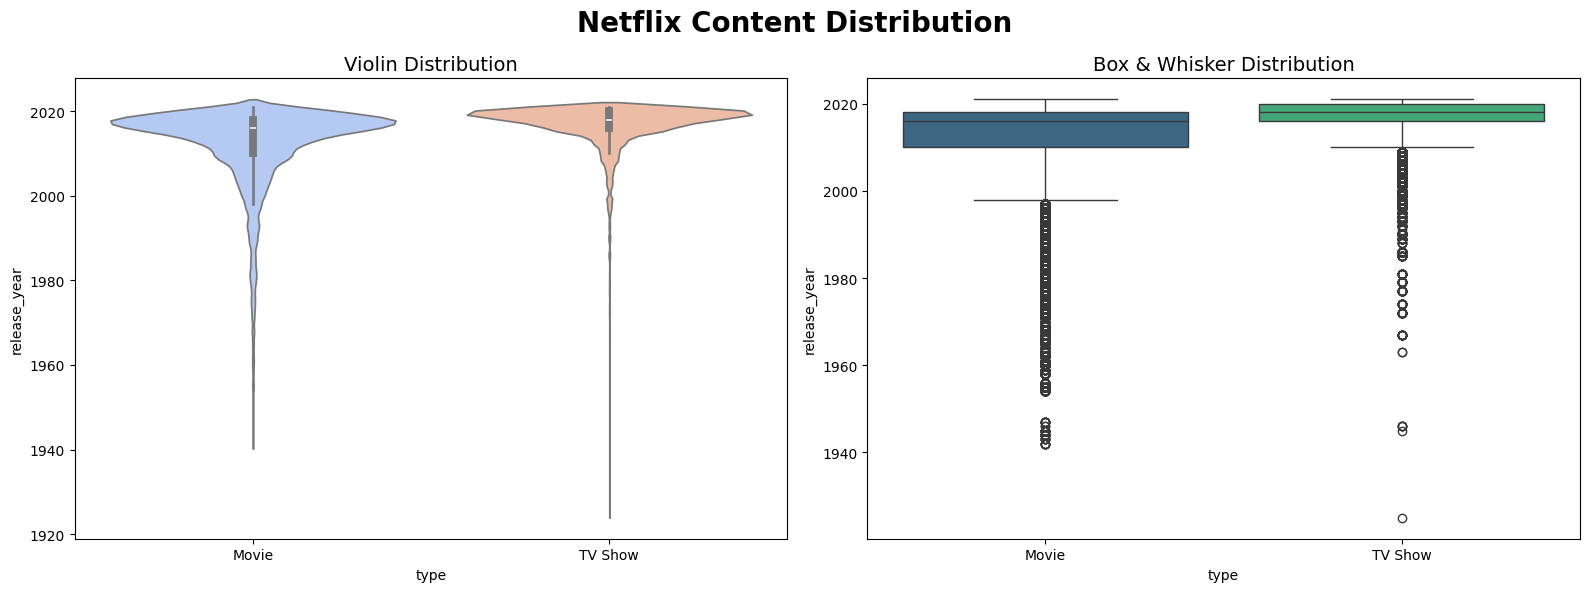

In [57]:
plt.figure(figsize=(16, 6))
plt.suptitle("Netflix Content Distribution", fontweight='bold', fontsize=20)

# Violin Plot
plt.subplot(1, 2, 1)
sns.violinplot(data=nx, x='type', y='release_year', palette="coolwarm")
plt.title("Violin Distribution", fontsize=14)

# Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(data=nx, x='type', y='release_year', palette="viridis")
plt.title("Box & Whisker Distribution", fontsize=14)

plt.tight_layout()
plt.show()


#### 👉Insights :

- Here we can identify that the contents released before 1960 are the outliers.
--------------------------------

#### 📌Q. In which year maximum contents got released ?

In [58]:
ryvc = nx.release_year.value_counts()[:20]

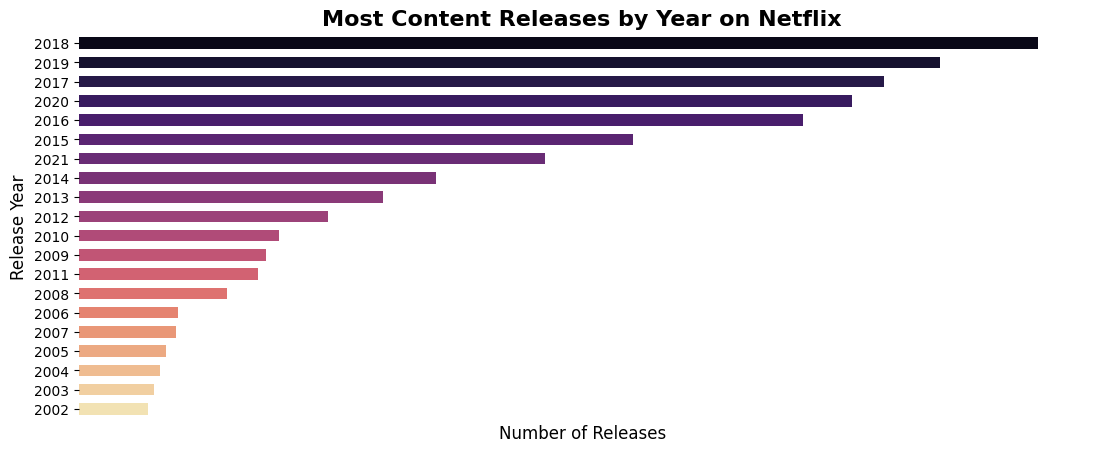

In [59]:
plt.figure(figsize=(13, 5))

sns.countplot(data=nx, y='release_year', order=ryvc.index, palette="magma", width=0.6)
sns.despine(left=True, bottom=True)

plt.xticks([])
plt.xlabel('Number of Releases', fontsize=12)
plt.ylabel('Release Year', fontsize=12)
plt.title('Most Content Releases by Year on Netflix', fontsize=16, fontweight='bold')

plt.show()


#### 👉Insights :

- Maximum contents got released in `2018` followed by `2019`.
--------------------------------

### Multivariate Analisys

#### 📌Q. How much contents are added every year in netflix ?

In [60]:
yc = nx.groupby(['year_added','type'])[['show_id']].nunique().reset_index()
yc.sort_values(by='show_id',ascending=False)

,year_added,type,show_id
18,2019,Movie,1424
20,2020,Movie,1284
16,2018,Movie,1237
22,2021,Movie,993
14,2017,Movie,839
21,2020,TV Show,692
19,2019,TV Show,575
23,2021,TV Show,505
17,2018,TV Show,388
15,2017,TV Show,325


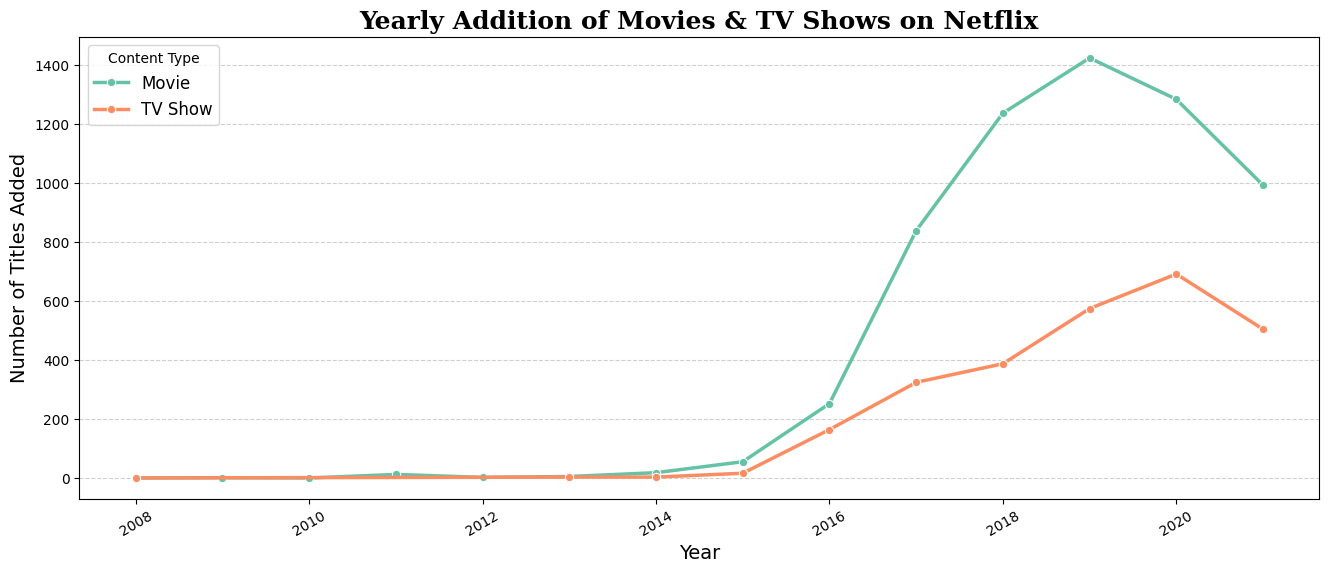

In [61]:
plt.figure(figsize=(16, 6))
plt.style.use('seaborn-v0_8-bright')

sns.lineplot(data=yc, x='year_added', y='show_id', hue='type',
             marker='o', linewidth=2.5, palette='Set2')

plt.title('Yearly Addition of Movies & TV Shows on Netflix', fontsize=18, fontweight="bold", fontfamily='serif')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Titles Added', fontsize=14)
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.legend(title="Content Type", loc='upper left', fontsize=12)

plt.show()


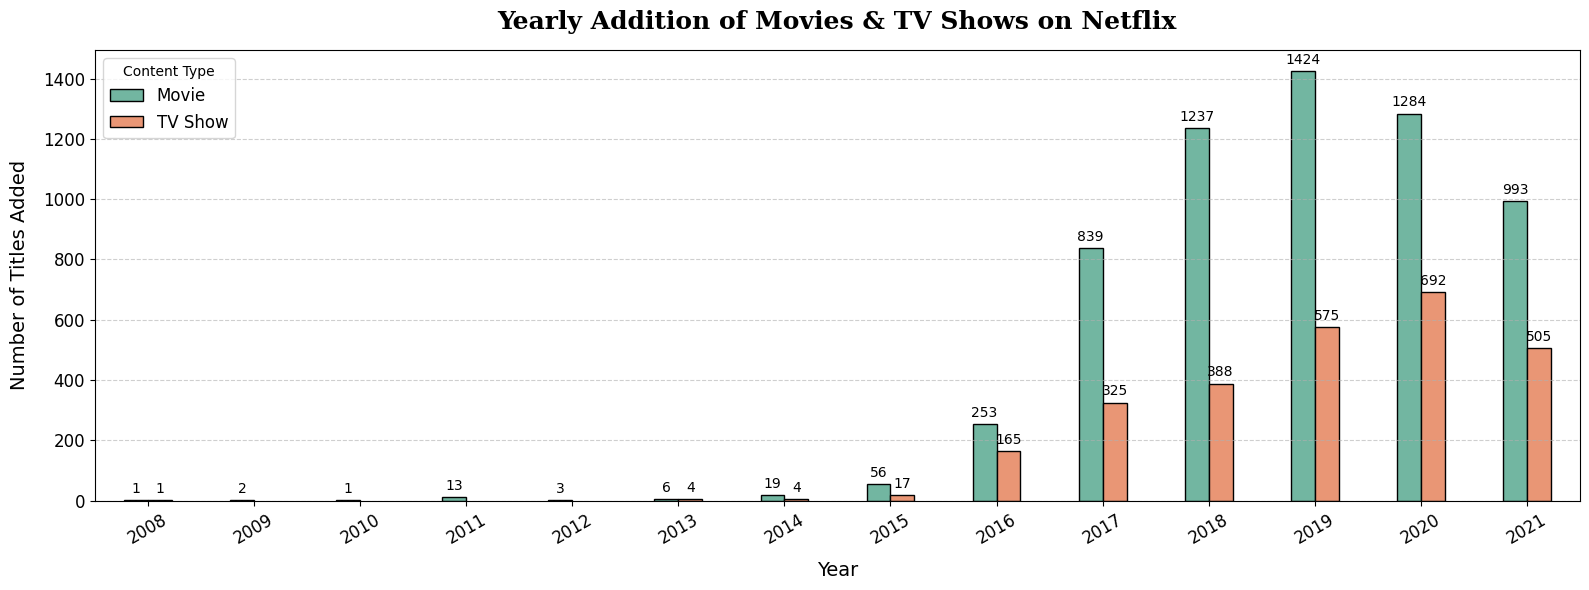

In [62]:
plt.figure(figsize=(16, 6))
plt.style.use('seaborn-v0_8-bright')

# Improved bar plot
c = sns.barplot(data=yc, x='year_added', y='show_id', hue='type',
                palette='Set2', width=0.45, edgecolor='black')

# Title & Labels
plt.title('Yearly Addition of Movies & TV Shows on Netflix',
          fontsize=18, fontweight="bold", fontfamily='serif', pad=15)
plt.xlabel('Year', fontsize=14, labelpad=10)
plt.ylabel('Number of Titles Added', fontsize=14, labelpad=10)
plt.xticks(rotation=30, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Bar labels for better readability
for container in c.containers:
    c.bar_label(container, label_type='edge', fontsize=10, padding=3)

# Enhanced legend placement
plt.legend(title="Content Type", loc='upper left', fontsize=12, frameon=True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


#### 👉Insights :

- Netflix's content library grew significantly after 2016, peaking in 2019 with over 1,400 movies and 575 TV shows added.
- Movies consistently outnumber TV Shows, but TV content saw rapid growth from 2017 onward.
--------------------------------


#### 📌Q. How much contents gets released every year?

In [63]:
rc = nx.groupby(['release_year','type'])[['show_id']].nunique().reset_index()
rc.sort_values(by='show_id',ascending=False)

print(rc.to_string())

     release_year     type  show_id
0            1925  TV Show        1
1            1942    Movie        2
2            1943    Movie        3
3            1944    Movie        3
4            1945    Movie        3
5            1945  TV Show        1
6            1946    Movie        1
7            1946  TV Show        1
8            1947    Movie        1
9            1954    Movie        2
10           1955    Movie        3
11           1956    Movie        2
12           1958    Movie        3
13           1959    Movie        1
14           1960    Movie        4
15           1961    Movie        1
16           1962    Movie        3
17           1963    Movie        1
18           1963  TV Show        1
19           1964    Movie        2
20           1965    Movie        2
21           1966    Movie        1
22           1967    Movie        4
23           1967  TV Show        1
24           1968    Movie        3
25           1969    Movie        2
26           1970    Movie  

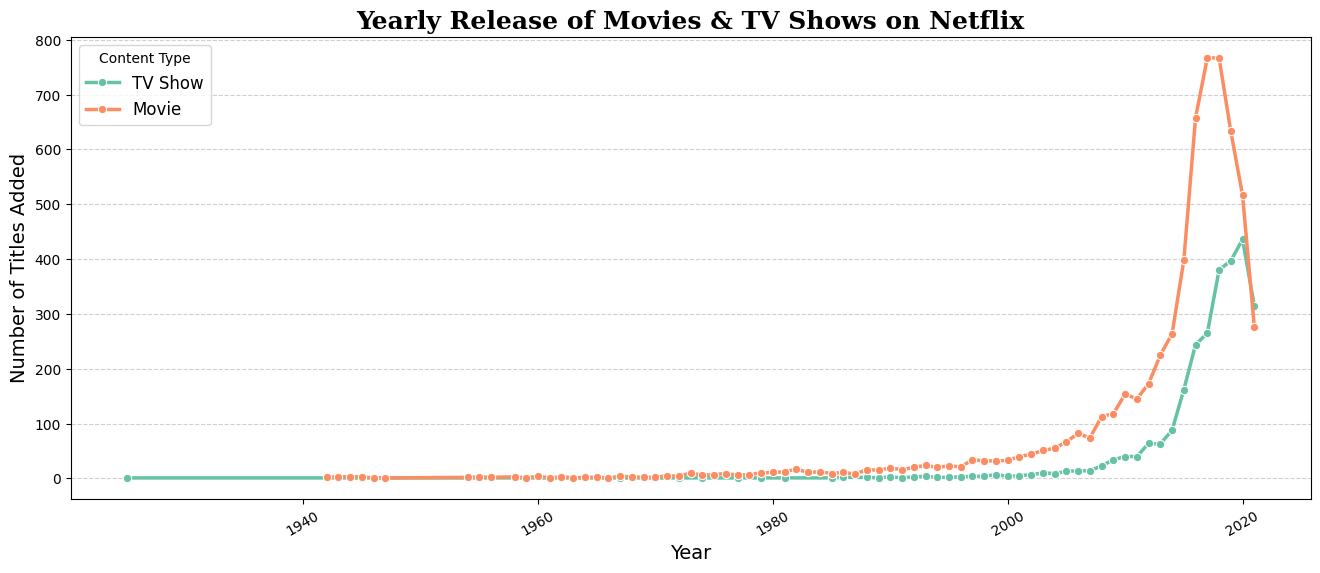

In [64]:
plt.figure(figsize=(16, 6))
plt.style.use('seaborn-v0_8-bright')

sns.lineplot(data=rc, x='release_year', y='show_id', hue='type',
                          marker='o', linewidth=2.5, palette='Set2')

plt.title('Yearly Release of Movies & TV Shows on Netflix', fontsize=18, fontweight="bold", fontfamily='serif')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Titles Added', fontsize=14)
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.legend(title="Content Type", loc='upper left', fontsize=12)

plt.show()

#### 👉Insights :

- Netflix has few movies and TV shows from before 2010 compared to the vast collection from more recent years.

- A large portion of Netflix's available content comes from 2017 and 2018, making them the most predominant years in the library.
--------------------------------


### Univariate Analisys

#### 📌Q. What are the top 10 genres in Netflix ?

In [65]:
mg = md.groupby(['listed_in'])[['title']].nunique().sort_values(by='title',ascending=False)[:10]
mg = mg.reset_index()
mg

,listed_in,title
0,International Movies,2624
1,Dramas,1600
2,Comedies,1210
3,Action & Adventure,859
4,Documentaries,829
5,Dramas,827
6,Independent Movies,736
7,Romantic Movies,613
8,Children & Family Movies,605
9,Thrillers,512


In [66]:
# Clean the 'listed_in' column before grouping
tvd['listed_in'] = tvd['listed_in'].str.strip().str.title()

# Now perform the groupby and other operations
tvg = tvd.groupby(['listed_in'])[['title']].nunique()
tvg = tvg.sort_values(by='title',ascending=False)[:10]
tvg = tvg.reset_index()

tvg

,listed_in,title
0,International Tv Shows,1351
1,Tv Dramas,763
2,Tv Comedies,581
3,Crime Tv Shows,470
4,Kids' Tv,451
5,Docuseries,395
6,Romantic Tv Shows,370
7,Reality Tv,255
8,British Tv Shows,253
9,Anime Series,176


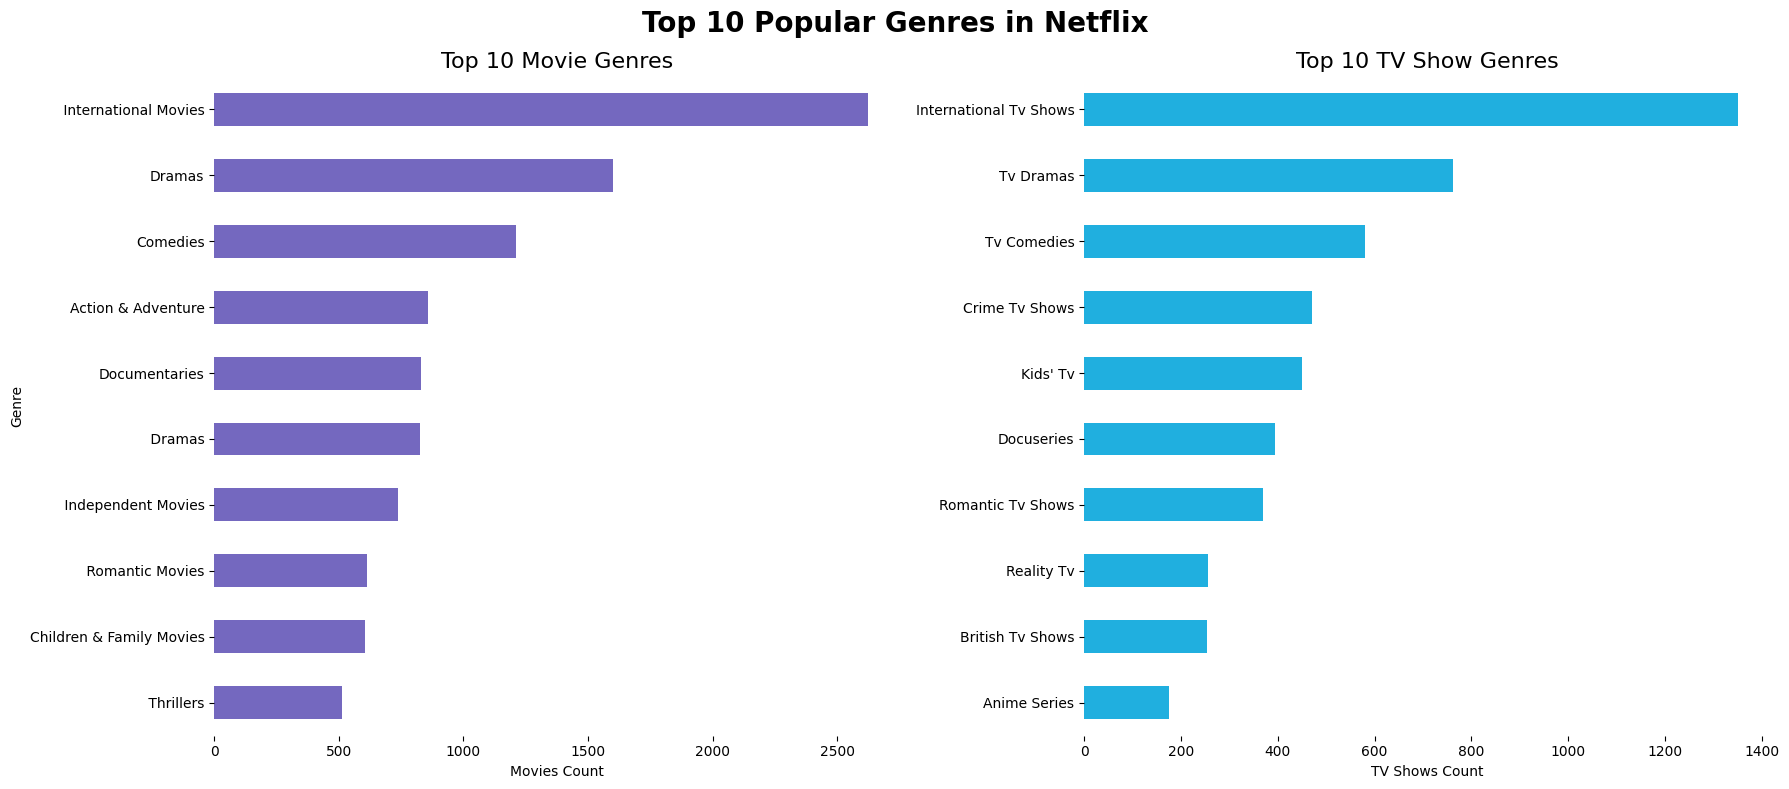

In [67]:
plt.figure(figsize=(18, 8))
plt.suptitle('Top 10 Popular Genres in Netflix',
             fontsize=20, fontweight="bold")

# Movie Genre (Horizontal Bar)
plt.subplot(1, 2, 1)
sns.barplot(data=mg, y='listed_in', x='title', color='slateblue', width=0.5)
sns.despine(left=True, bottom=True, trim=True)
plt.title('Top 10 Movie Genres', fontsize=16)
plt.xlabel('Movies Count')
plt.ylabel('Genre')

# TV Show Genre (Horizontal Bar)
plt.subplot(1, 2, 2)
sns.barplot(data=tvg, y='listed_in', x='title', color='deepskyblue', width=0.5)
sns.despine(left=True, bottom=True, trim=True)
plt.title('Top 10 TV Show Genres', fontsize=16)
plt.xlabel('TV Shows Count')
plt.ylabel('')

plt.tight_layout()
plt.show()

#### 👉Insights :

- International content is a major part of Netflix’s library across both movies and TV shows.

-  Drama, Comedy, and Action remain the most in-demand genres.
--------------------------------

#### 📌Q. what genre's are more preferred by directors ?

In [68]:
mdgd = md.groupby(['listed_in'])[['director']].nunique().sort_values(by='director',ascending=False)[:10]
mdgd

,director
listed_in,
International Movies,2170
Dramas,1429
Comedies,1057
Documentaries,840
Independent Movies,765
Dramas,759
Action & Adventure,715
Children & Family Movies,536
Romantic Movies,531


In [69]:
tvdgd = tvd.groupby(['listed_in'])[['director']].nunique().sort_values(by='director',ascending=False)[:10]
tvdgd

,director
listed_in,
International Tv Shows,165
Tv Dramas,92
Crime Tv Shows,81
Docuseries,77
Tv Comedies,54
Romantic Tv Shows,31
Tv Shows,30
British Tv Shows,26
Spanish-Language Tv Shows,21


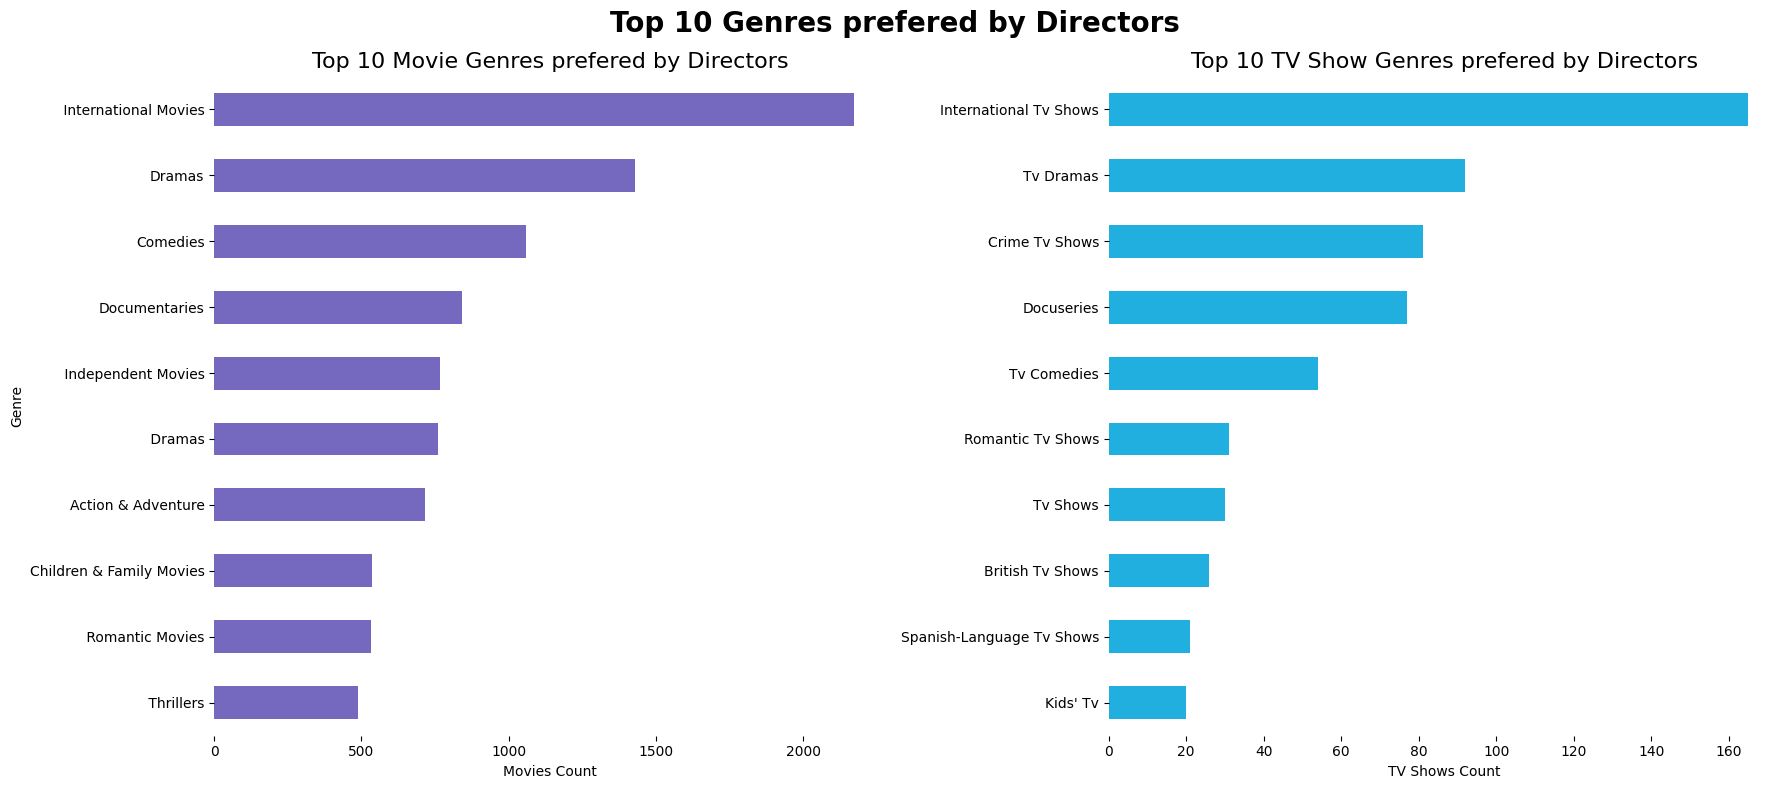

In [70]:
plt.figure(figsize=(18, 8))
plt.suptitle('Top 10 Genres prefered by Directors',
             fontsize=20, fontweight="bold")

# Movie Genre (Horizontal Bar)
plt.subplot(1, 2, 1)
sns.barplot(data=mdgd, y='listed_in', x='director', color='slateblue', width=0.5)
sns.despine(left=True, bottom=True, trim=True)
plt.title('Top 10 Movie Genres prefered by Directors', fontsize=16)
plt.xlabel('Movies Count')
plt.ylabel('Genre')

# TV Show Genre (Horizontal Bar)
plt.subplot(1, 2, 2)
sns.barplot(data=tvdgd, y='listed_in', x='director', color='deepskyblue', width=0.5)
sns.despine(left=True, bottom=True, trim=True)
plt.title('Top 10 TV Show Genres prefered by Directors', fontsize=16)
plt.xlabel('TV Shows Count')
plt.ylabel('')

plt.tight_layout()
plt.show()

#### 👉Insights :

- Genres like Dramas, Comedies, Crime,and Documentaries are prefered by directors across Movies and Tv Shows.  
--------------------------------

#### 📌Q. How are contents distributed based on Runtime & Seasons

In [71]:
mrm = md.groupby(['runtime_in_mins'])[['title']].nunique().sort_values(by='title',ascending=False)
mrm
print(mrm.to_string())

                 title
runtime_in_mins       
90                 152
94                 146
93                 146
97                 146
91                 144
95                 137
96                 130
92                 129
102                122
98                 120
99                 118
88                 116
101                116
103                114
106                111
100                108
89                 106
104                104
86                 103
87                 101
105                101
107                 98
110                 97
108                 87
116                 80
112                 74
85                  73
109                 69
113                 69
111                 68
84                  68
83                  65
118                 65
119                 63
81                  62
115                 61
117                 61
120                 56
114                 56
121                 54
124                 52
82         

In [72]:
tvs = tvd.groupby(['no_of_seasons'])[['title']].nunique().sort_values(by='title',ascending=False)
tvs

,title
no_of_seasons,
1,1793
2,425
3,199
4,95
5,65
6,33
7,23
8,17
9,9


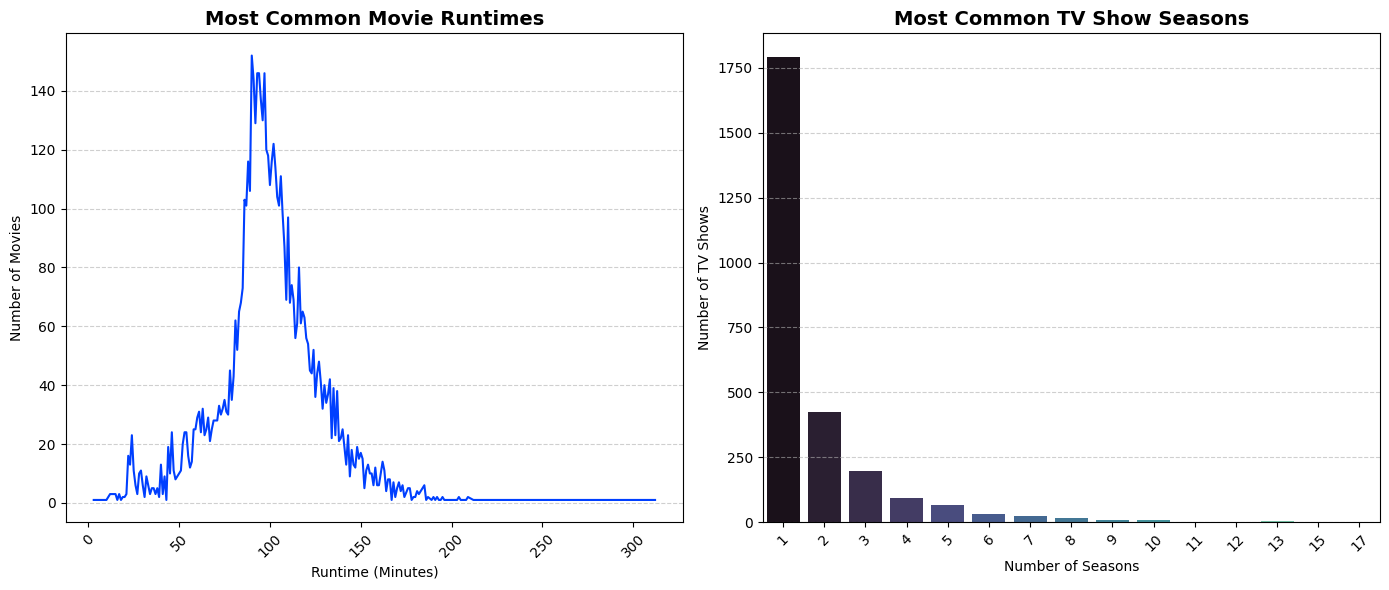

In [73]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data =mrm,  x='runtime_in_mins', y='title', palette="viridis")
plt.title("Most Common Movie Runtimes", fontsize=14, fontweight="bold")
plt.xlabel("Runtime (Minutes)")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.subplot(1, 2, 2)
sns.barplot(data=tvs, x='no_of_seasons', y='title', palette="mako")
plt.title("Most Common TV Show Seasons", fontsize=14, fontweight="bold")
plt.xlabel("Number of Seasons")
plt.ylabel("Number of TV Shows")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

#### 👉Insights :

- The most frequent movie runtimes are between 90-100 minutes, suggesting an optimal duration for audience engagement.

- Most TV shows have 1-3 seasons, indicating a trend toward shorter series or limited runs.
--------------------------------

#### 📌Q. What are the ratings given for the contents uploaded on netflix ?

In [74]:
movie_rating = md.groupby(['rating'])[['title']].nunique().reset_index()
movie_rating = movie_rating.sort_values(by='title',ascending=False)
movie_rating

,rating,title
8,TV-MA,2062
6,TV-14,1427
5,R,797
9,TV-PG,540
4,PG-13,490
3,PG,287
11,TV-Y7,139
10,TV-Y,131
7,TV-G,126
2,NR,75


In [75]:
tv_rating = tvd.groupby(['rating'])[['title']].nunique().reset_index()
tv_rating = tv_rating.sort_values(by='title',ascending=False)
tv_rating

,rating,title
4,TV-MA,1145
2,TV-14,733
5,TV-PG,323
7,TV-Y7,195
6,TV-Y,176
3,TV-G,94
0,NR,5
1,R,2
9,Unknown,2
8,TV-Y7-FV,1


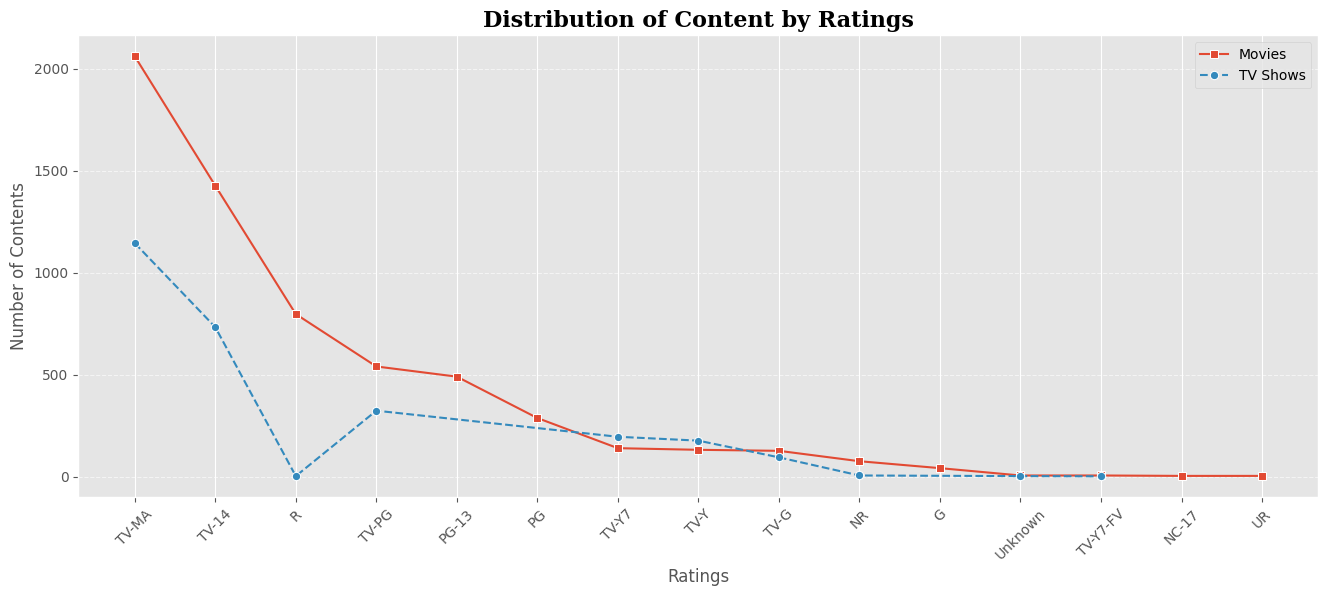

In [76]:
plt.figure(figsize=(16,6))
plt.style.use('ggplot')

sns.lineplot(data=movie_rating, x='rating', y='title', label='Movies', marker='s', linestyle='-')
sns.lineplot(data=tv_rating, x='rating', y='title', label='TV Shows', marker='o', linestyle='--')

plt.title('Distribution of Content by Ratings', fontsize=16, fontweight="bold", fontfamily='serif')
plt.ylabel('Number of Contents')
plt.xlabel('Ratings')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.legend(loc='upper right', frameon=True)

plt.show()


#### 👉Insights :

Movies
- The most frequent rating is "TV-MA", with 2,062 titles, indicating that a large portion of Netflix's content is tailored for mature audiences.

- "TV-14", with 1,427 titles, is the second most common rating, signifying content appropriate for viewers aged 14 and older.

- "R" (Restricted) comes in third with 797 titles, meaning viewers under 17 require parental or adult supervision.

TV Shows

- "TV-MA" leads with 1,145 titles, showing that a significant number of TV shows are designed for mature viewers.

- "TV-14", with 733 titles, follows closely behind, catering to teen audiences.

- "TV-PG" ranks third with 323 titles, suggesting a notable selection of family-friendly shows that may require parental guidance.
--------------------------------



#### 📌Q. Top actors with the most appearances in Netflix content.


In [77]:
movies_cast = md.groupby('cast')[['title']].nunique().sort_values(by='title',ascending=False)[1:11]
movies_cast

,title
cast,
Anupam Kher,38
Rupa Bhimani,27
Om Puri,27
Shah Rukh Khan,26
Boman Irani,25
Paresh Rawal,25
Julie Tejwani,24
Akshay Kumar,23
Rajesh Kava,21


In [78]:
tv_cast = tvd.groupby('cast')[['title']].nunique().sort_values(by='title',ascending=False)[1:11]
tv_cast

,title
cast,
Takahiro Sakurai,24
Yuki Kaji,17
Junichi Suwabe,17
Ai Kayano,17
David Attenborough,14
Daisuke Ono,14
Yoshimasa Hosoya,13
Takehito Koyasu,13
Yuichi Nakamura,13


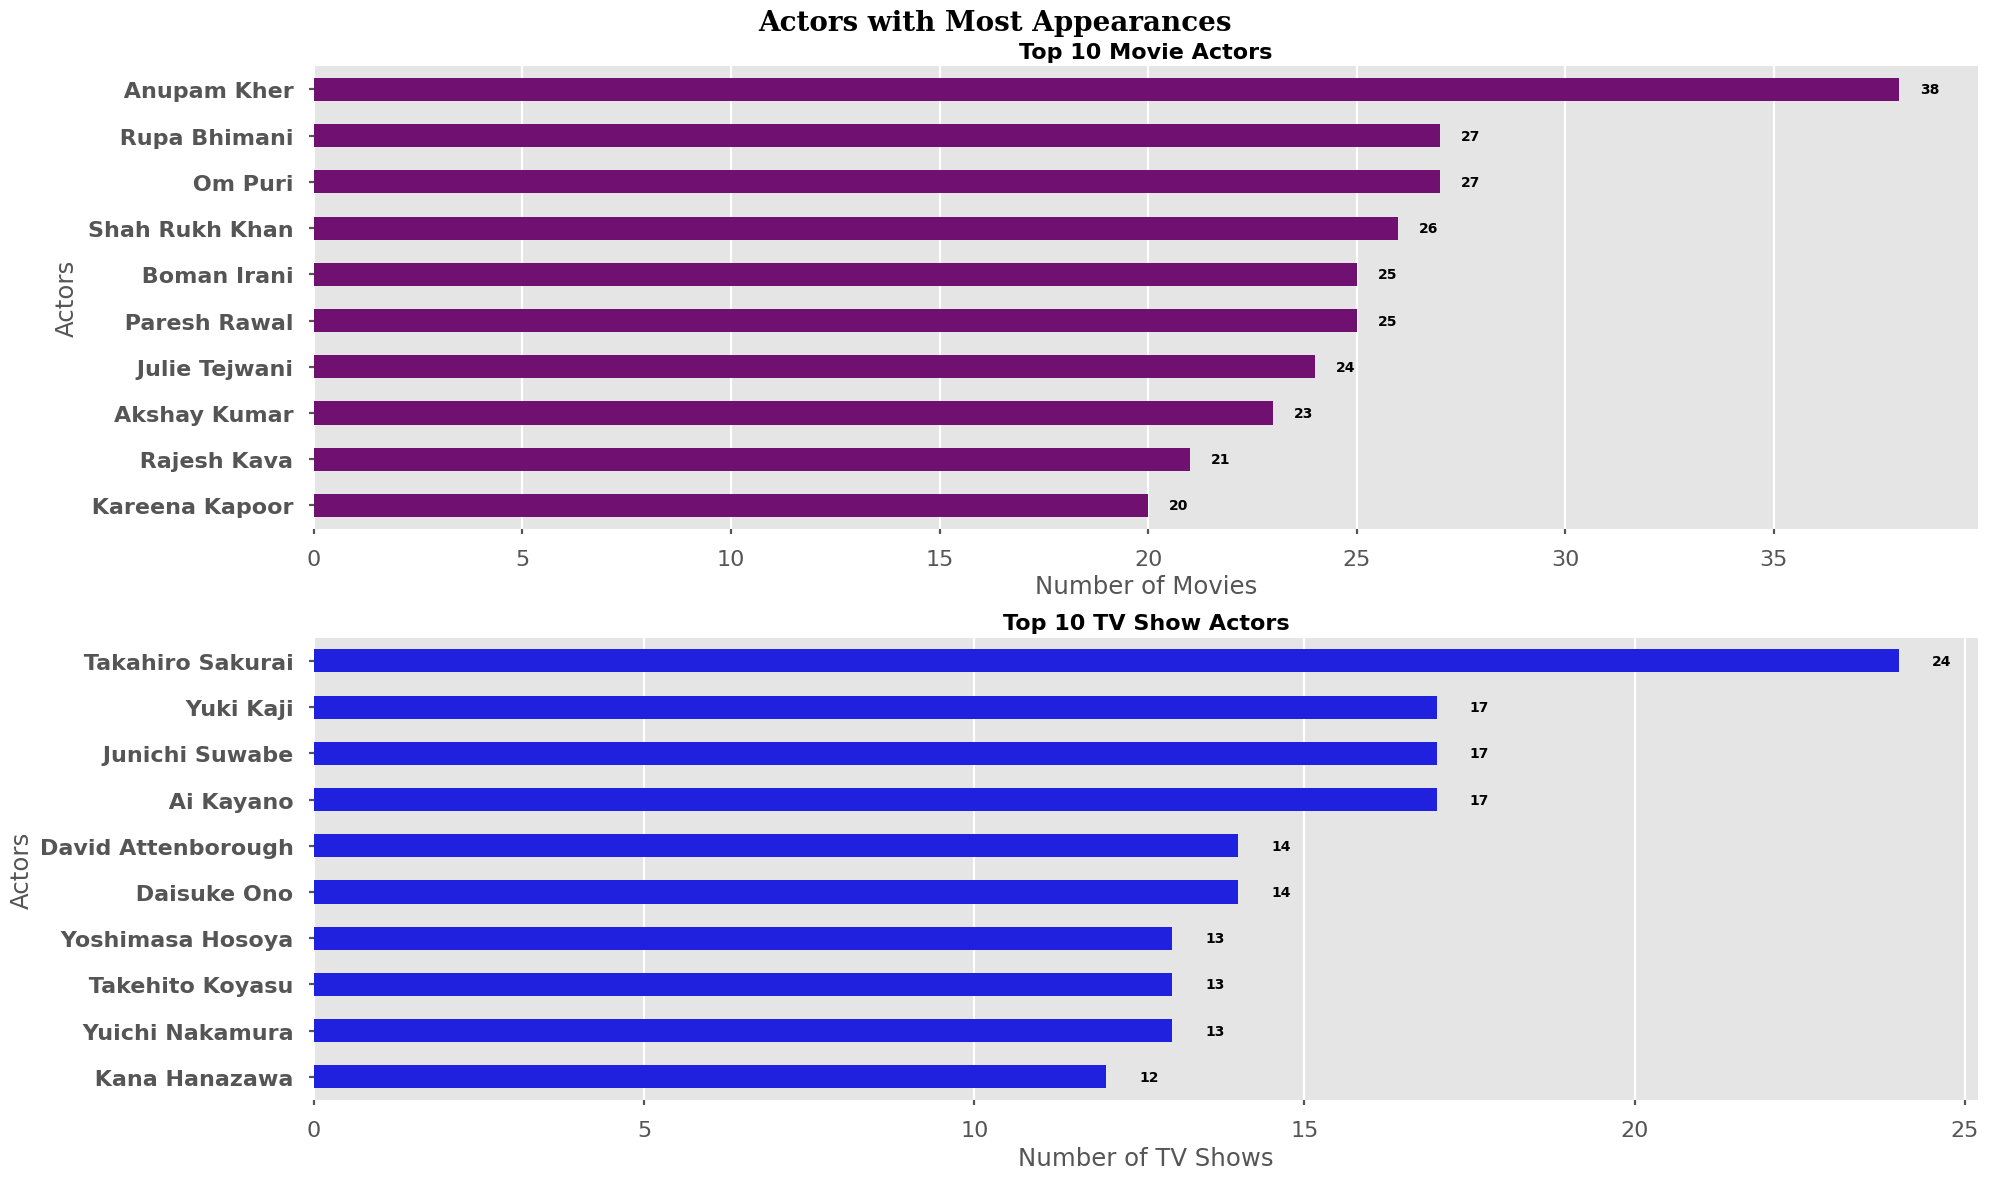

In [79]:
plt.figure(figsize=(20,12))
plt.suptitle('Actors with Most Appearances',
             fontsize=20, fontweight="bold", fontfamily='serif')
plt.style.use('seaborn-v0_8-poster')

plt.subplot(2,1,1)
c1 = sns.barplot(y=movies_cast.index[:10], x=movies_cast.title[:10], color="purple", width=0.5)
sns.despine(left=True, bottom=True, trim=True)
plt.title('Top 10 Movie Actors', fontsize=16, fontweight="bold")
plt.xlabel('Number of Movies')
plt.ylabel('Actors')
plt.yticks(fontweight='bold')

for i, v in enumerate(movies_cast.title[:10]):
    plt.text(v + 0.5, i, str(v), color='black', ha='left', va='center', fontweight='bold')

plt.subplot(2,1,2)
c2 = sns.barplot(y=tv_cast.index[:10], x=tv_cast.title[:10], color="blue", width=0.5)
sns.despine(left=True, bottom=True, trim=True)
plt.title('Top 10 TV Show Actors', fontsize=16, fontweight="bold")
plt.xlabel('Number of TV Shows')
plt.ylabel('Actors')
plt.yticks(fontweight='bold')

for i, v in enumerate(tv_cast.title[:10]):
    plt.text(v + 0.5, i, str(v), color='black', ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

#### 👉Insights :

Movies
- Anupam Kher has appeared in the highest number of Netflix movies.

- Rupa Bhimani and Om Puri follow closely.

- Shah Rukh Khan, Boman Irani, and Paresh Rawal have also been featured prominently.

TV Shows

- Takahiro Sakurai leads in TV appearances.

- Yuki Kaji, Junichi Suwabe, and Ai Kayano follow closely.
--------------------------------


#### 📌Q. Top directors with the most content in Netflix.

In [80]:
movie_director = md.groupby('director')[['show_id']].nunique().sort_values(by='show_id',ascending=False)[1:11]
movie_director

,show_id
director,
Rajiv Chilaka,22
Jan Suter,18
Raúl Campos,18
Suhas Kadav,16
Jay Karas,15
Marcus Raboy,15
Cathy Garcia-Molina,13
Martin Scorsese,12
Jay Chapman,12


In [81]:
tv_director = tvd.groupby('director')[['show_id']].nunique().sort_values(by='show_id',ascending=False)[1:11]
tv_director

,show_id
director,
Ken Burns,3
Alastair Fothergill,3
Rob Seidenglanz,2
Gautham Vasudev Menon,2
Iginio Straffi,2
Hsu Fu-chun,2
Shin Won-ho,2
Jung-ah Im,2
Joe Berlinger,2


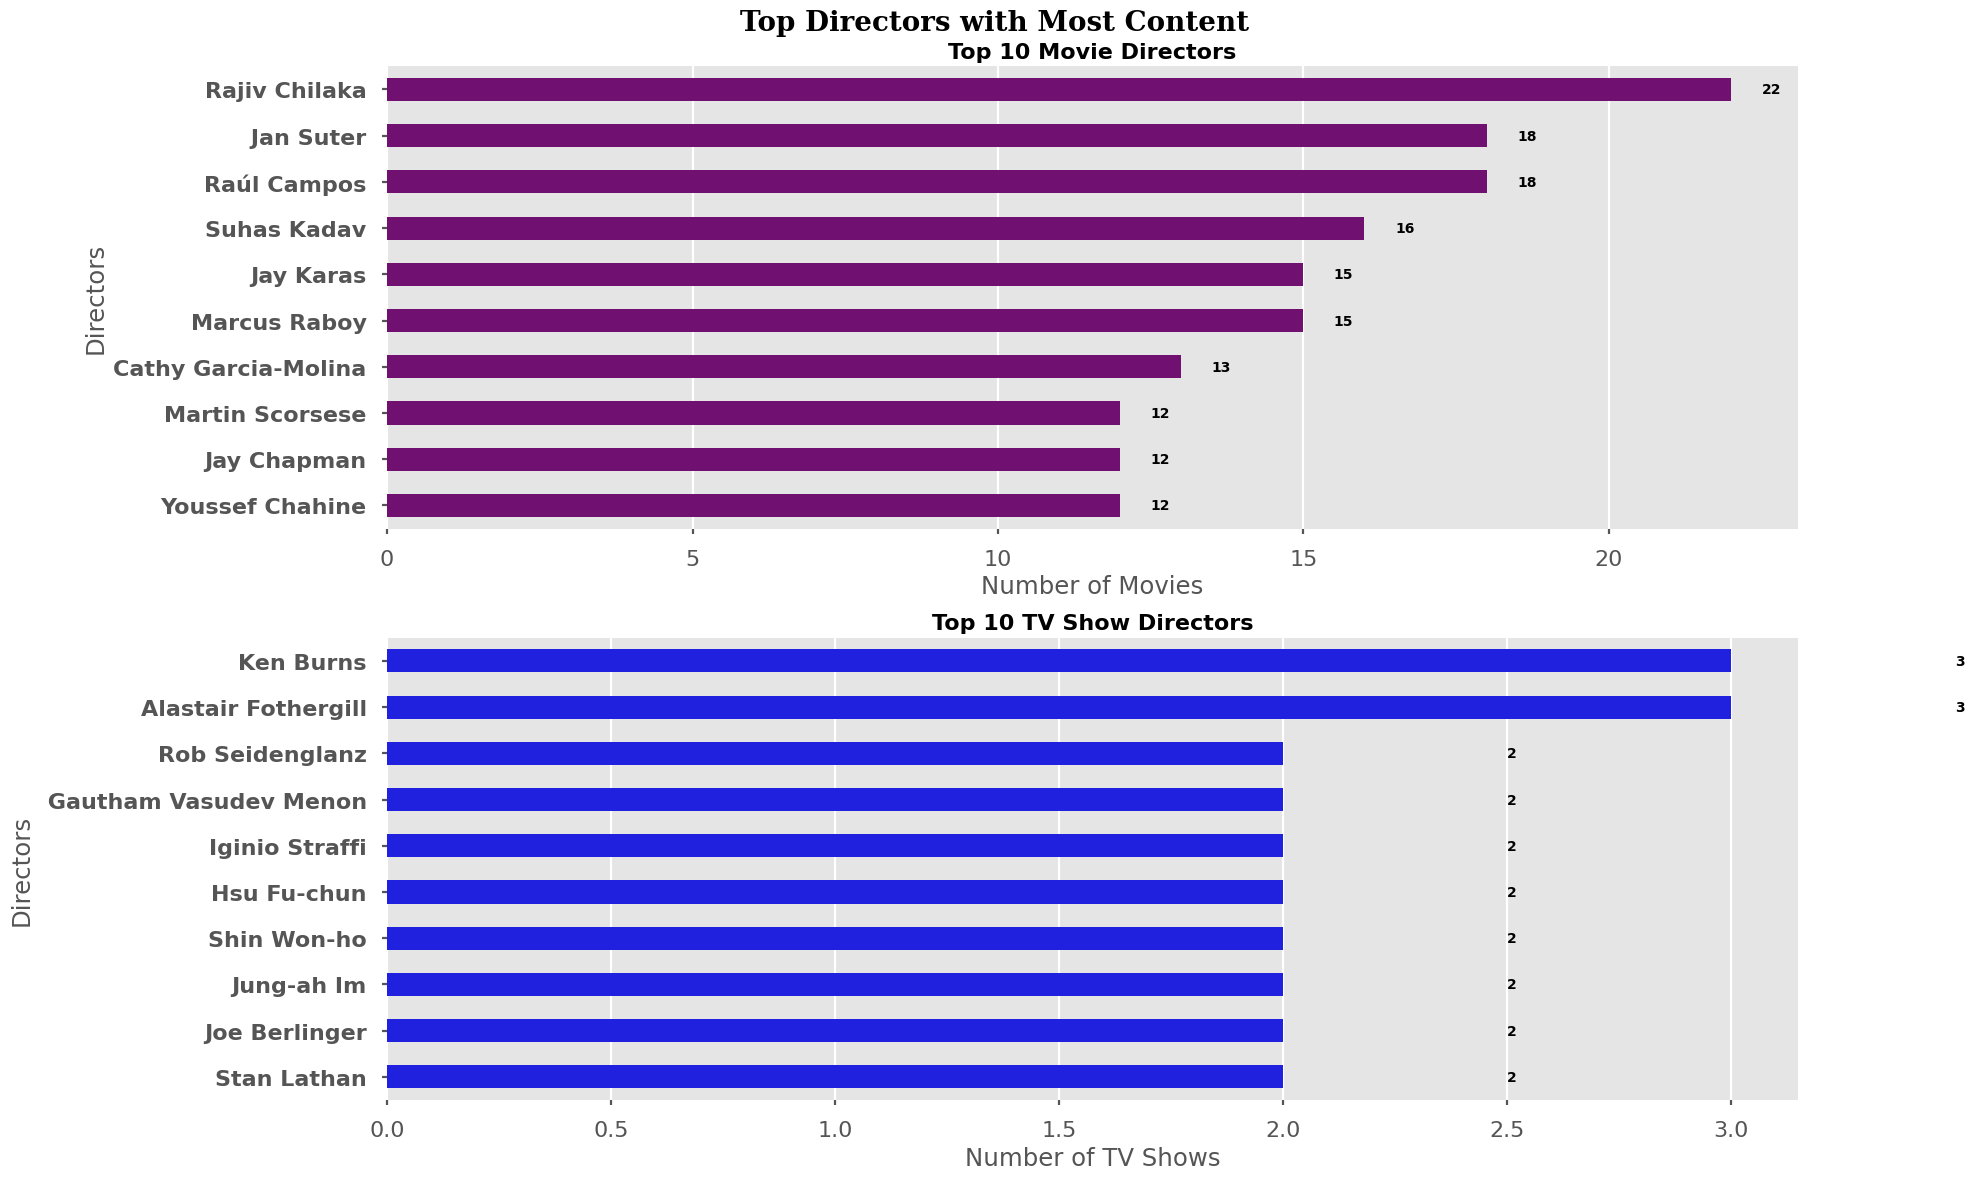

In [82]:
plt.figure(figsize=(20,12))
plt.suptitle('Top Directors with Most Content',
             fontsize=20, fontweight="bold", fontfamily='serif')
plt.style.use('seaborn-v0_8-poster')

plt.subplot(2,1,1)
c1 = sns.barplot(y=movie_director.index[:10], x=movie_director.show_id[:10], color="purple", width=0.5)
sns.despine(left=True, bottom=True, trim=True)
plt.title('Top 10 Movie Directors', fontsize=16, fontweight="bold")
plt.xlabel('Number of Movies')
plt.ylabel('Directors')
plt.yticks(fontweight='bold')

for i, v in enumerate(movie_director.show_id[:10]):
    plt.text(v + 0.5, i, str(v), color='black', ha='left', va='center', fontweight='bold')

plt.subplot(2,1,2)
c2 = sns.barplot(y=tv_director.index[:10], x=tv_director.show_id[:10], color="blue", width=0.5)
sns.despine(left=True, bottom=True, trim=True)
plt.title('Top 10 TV Show Directors', fontsize=16, fontweight="bold")
plt.xlabel('Number of TV Shows')
plt.ylabel('Directors')
plt.yticks(fontweight='bold')

for i, v in enumerate(tv_director.show_id[:10]):
    plt.text(v + 0.5, i, str(v), color='black', ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

#### 👉Insights :

Movies
- Rajiv Chilaka has directed the most Netflix movies.

TV Shows

- Ken Burns and Alastair Fothergill lead in TV show direction.
--------------------------------

#### 📌Q. What is the best time to launch a movie?

In [83]:
movie_release = md[['show_id','title','date_added']]
movie_release = movie_release.reset_index(drop=True)
movie_release

,show_id,title,date_added
0,s1,Dick Johnson Is Dead,2021-09-25
1,s7,My Little Pony: A New Generation,2021-09-24
2,s7,My Little Pony: A New Generation,2021-09-24
3,s7,My Little Pony: A New Generation,2021-09-24
4,s7,My Little Pony: A New Generation,2021-09-24
...,...,...,...
145912,s8807,Zubaan,2019-03-02
145913,s8807,Zubaan,2019-03-02
145914,s8807,Zubaan,2019-03-02
145915,s8807,Zubaan,2019-03-02


In [84]:
movie_release.dtypes

,0
show_id,object
title,object
date_added,object


In [85]:
movie_release['date_added'] = pd.to_datetime(movie_release['date_added'])

In [86]:
movie_release.dtypes

,0
show_id,object
title,object
date_added,datetime64[ns]


In [87]:
movie_release.isna().sum()

,0
show_id,0
title,0
date_added,0


In [88]:
movie_release['uploaded_week'] = movie_release['date_added'].dt.isocalendar().week
movie_release['uploaded_weekday'] = movie_release['date_added'].dt.strftime('%A')
movie_release['uploaded_month'] = movie_release['date_added'].dt.strftime('%B')

In [89]:
month_order = ['January', 'February', 'March', 'April', 'May',
               'June', 'July', 'August', 'September',
               'October', 'November', 'December']
movie_release['uploaded_month']= pd.Categorical(movie_release['uploaded_month'],
                                            categories=month_order, ordered=True)

In [90]:
movie_release

,show_id,title,date_added,uploaded_week,uploaded_weekday,uploaded_month
0,s1,Dick Johnson Is Dead,2021-09-25,38,Saturday,September
1,s7,My Little Pony: A New Generation,2021-09-24,38,Friday,September
2,s7,My Little Pony: A New Generation,2021-09-24,38,Friday,September
3,s7,My Little Pony: A New Generation,2021-09-24,38,Friday,September
4,s7,My Little Pony: A New Generation,2021-09-24,38,Friday,September
...,...,...,...,...,...,...
145912,s8807,Zubaan,2019-03-02,9,Saturday,March
145913,s8807,Zubaan,2019-03-02,9,Saturday,March
145914,s8807,Zubaan,2019-03-02,9,Saturday,March
145915,s8807,Zubaan,2019-03-02,9,Saturday,March


In [91]:
week_movie_release=movie_release.groupby('uploaded_week')['show_id'].nunique()
week_movie_release=week_movie_release.reset_index()
week_movie_release

,uploaded_week,show_id
0,1,316
1,2,78
2,3,81
3,4,56
4,5,135
5,6,64
6,7,106
7,8,72
8,9,207
9,10,107


In [92]:
week_movie_release.sum()

,0
uploaded_week,1431.0
show_id,6131.0


In [93]:
monthly_movie_release=movie_release.groupby('uploaded_month')['show_id'].nunique()
monthly_movie_release = monthly_movie_release.reset_index()
monthly_movie_release = monthly_movie_release.sort_values(by='uploaded_month')
monthly_movie_release.reset_index(drop=True)
monthly_movie_release

,uploaded_month,show_id
0,January,546
1,February,382
2,March,529
3,April,550
4,May,439
5,June,492
6,July,565
7,August,519
8,September,519
9,October,545


In [94]:
monthly_movie_release.show_id.sum()

np.int64(6131)

In [95]:
movies_release_pivot = movie_release.pivot_table(index='uploaded_month',
                                                 columns='uploaded_weekday',
                                                 values='show_id',
                                                 aggfunc=pd.Series.nunique)

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday',
             'Friday', 'Saturday','Sunday']
movies_release_pivot = movies_release_pivot[day_order]
movies_release_pivot

uploaded_weekday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
uploaded_month,,,,,,,
January,86,84,139,44,134,26,33
February,27,38,74,60,124,31,28
March,33,55,52,152,176,26,35
April,59,63,90,74,145,66,53
May,54,81,47,70,111,56,20
June,43,53,92,109,112,62,21
July,63,50,65,132,117,45,93
August,46,67,83,119,103,46,55
September,36,70,109,68,130,59,47


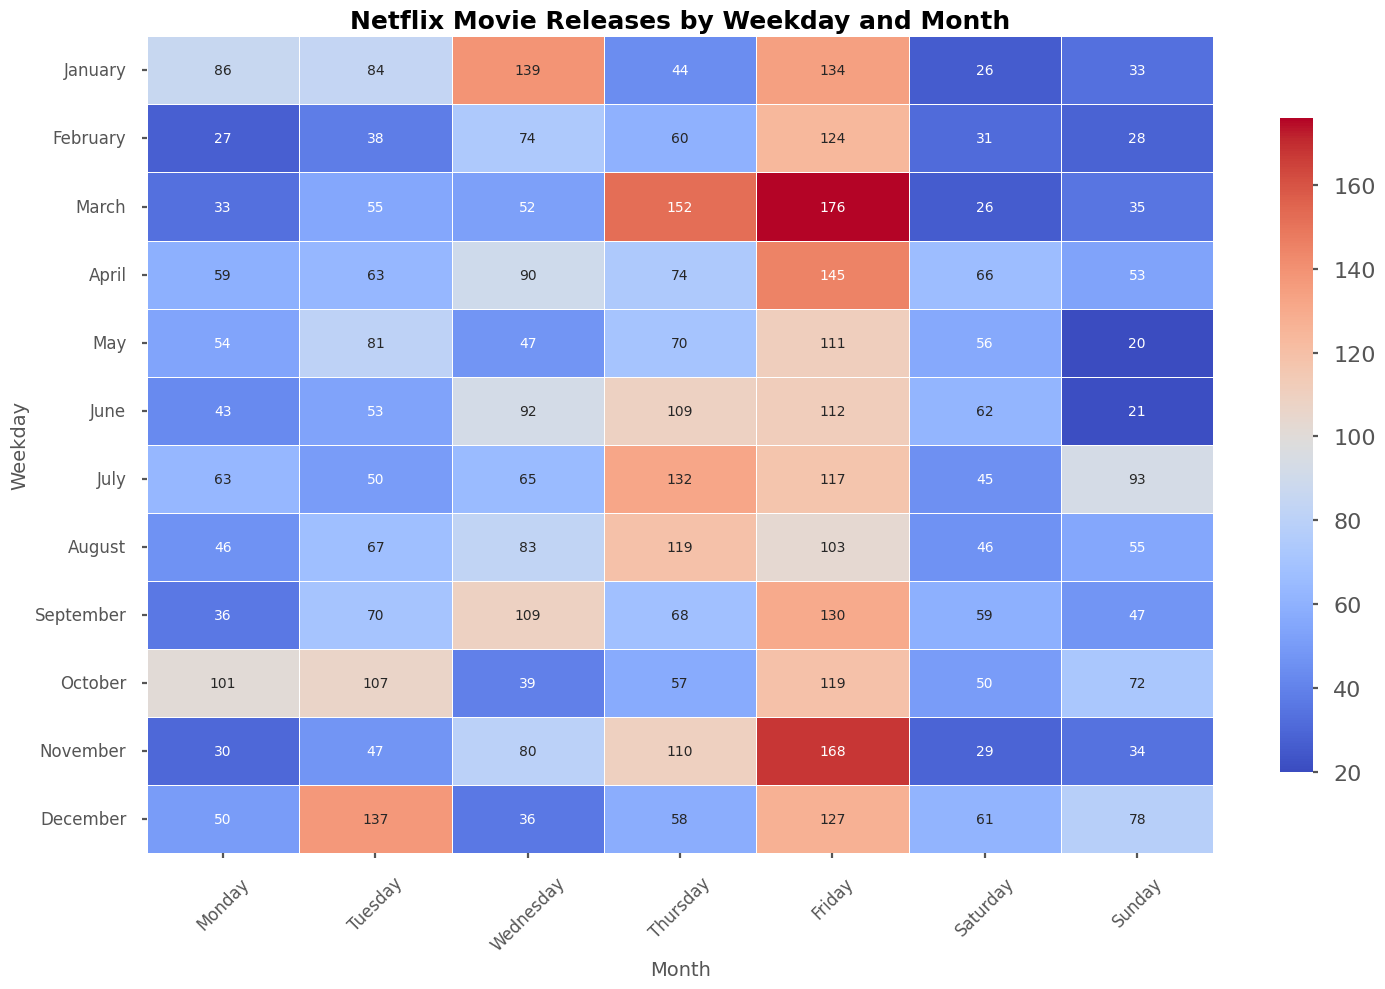

In [96]:
plt.figure(figsize=(15, 10))

sns.heatmap(movies_release_pivot, cmap='coolwarm',
            annot=True, fmt='d', linewidth=0.5, cbar_kws={"shrink": 0.8})

plt.title("Netflix Movie Releases by Weekday and Month", fontsize=18, fontweight='bold')
plt.xlabel("Month", fontsize=14)
plt.ylabel("Weekday", fontsize=14)

plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=0)

plt.tight_layout()
plt.show()

In [97]:
movies_release_pivot.sum().sort_values(ascending=False)

,0
uploaded_weekday,
Friday,1566
Thursday,1053
Wednesday,906
Tuesday,852
Monday,628
Sunday,569
Saturday,557


In [98]:
movies_release_pivot.sum().sum()

np.int64(6131)

#### 📌Q. What is the best time to launch a tv show?

In [99]:
tvs_release = tvd[['show_id','title','date_added']]
tvs_release = tvs_release.reset_index(drop=True)
tvs_release

,show_id,title,date_added
0,s2,Blood & Water,2021-09-24
1,s2,Blood & Water,2021-09-24
2,s2,Blood & Water,2021-09-24
3,s2,Blood & Water,2021-09-24
4,s2,Blood & Water,2021-09-24
...,...,...,...
56143,s8801,Zindagi Gulzar Hai,2016-12-15
56144,s8801,Zindagi Gulzar Hai,2016-12-15
56145,s8804,Zombie Dumb,2019-07-01
56146,s8804,Zombie Dumb,2019-07-01


In [100]:
tvs_release.dtypes

,0
show_id,object
title,object
date_added,object


In [101]:
tvs_release.isna().sum()

,0
show_id,0
title,0
date_added,0


In [102]:
tvs_release['date_added'].fillna(tvs_release['date_added'].mode()[0],inplace=True)

In [103]:
tvs_release['date_added'] = pd.to_datetime(tvs_release['date_added'])

In [104]:
tvs_release['date_added'].dtypes

dtype('<M8[ns]')

In [105]:
tvs_release['uploaded_week'] = tvs_release['date_added'].dt.isocalendar().week
tvs_release['uploaded_weekday'] = tvs_release['date_added'].dt.strftime('%A')
tvs_release['uploaded_month'] = tvs_release['date_added'].dt.strftime('%B')

In [106]:
month_order = ['January', 'February', 'March', 'April', 'May',
               'June', 'July', 'August', 'September',
               'October', 'November', 'December']
tvs_release['uploaded_month']= pd.Categorical(tvs_release['uploaded_month'],
                                    categories=month_order, ordered=True)

In [107]:
tvs_release

,show_id,title,date_added,uploaded_week,uploaded_weekday,uploaded_month
0,s2,Blood & Water,2021-09-24,38,Friday,September
1,s2,Blood & Water,2021-09-24,38,Friday,September
2,s2,Blood & Water,2021-09-24,38,Friday,September
3,s2,Blood & Water,2021-09-24,38,Friday,September
4,s2,Blood & Water,2021-09-24,38,Friday,September
...,...,...,...,...,...,...
56143,s8801,Zindagi Gulzar Hai,2016-12-15,50,Thursday,December
56144,s8801,Zindagi Gulzar Hai,2016-12-15,50,Thursday,December
56145,s8804,Zombie Dumb,2019-07-01,27,Monday,July
56146,s8804,Zombie Dumb,2019-07-01,27,Monday,July


In [108]:
tvs_release.groupby('uploaded_week')['show_id'].nunique().sum()

np.int64(2676)

In [109]:
week_release = tvs_release.groupby('uploaded_week')['show_id'].nunique()
week_release = week_release.reset_index()
week_release

,uploaded_week,show_id
0,1,150
1,2,26
2,3,31
3,4,31
4,5,68
5,6,33
6,7,41
7,8,37
8,9,46
9,10,28


In [110]:
month_release = tvs_release.groupby('uploaded_month')['show_id'].nunique()
month_release = month_release.reset_index()
month_release

,uploaded_month,show_id
0,January,279
1,February,175
2,March,205
3,April,209
4,May,187
5,June,232
6,July,254
7,August,230
8,September,246
9,October,210


In [111]:
tvs_release_pivot = tvs_release.pivot_table(
            index='uploaded_month' ,
            columns='uploaded_weekday' ,
            values='show_id' ,
            aggfunc=pd.Series.nunique
    )

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday',
                 'Friday', 'Saturday','Sunday']
tvs_release_pivot = tvs_release_pivot[day_order]
tvs_release_pivot

uploaded_weekday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
uploaded_month,,,,,,,
January,13,19,128,19,85,5,10
February,20,13,28,27,63,17,7
March,11,25,32,22,88,16,11
April,20,20,38,38,58,21,14
May,21,26,25,15,74,17,9
June,22,16,35,29,77,47,6
July,22,50,32,29,82,29,10
August,23,41,30,26,80,18,12
September,13,29,44,34,87,15,24


In [112]:
tvs_release_pivot.sum(axis=1)

,0
uploaded_month,
January,279
February,175
March,205
April,209
May,187
June,232
July,254
August,230
September,246


In [113]:
tvs_release_pivot.sum().sort_values(ascending=False)

,0
uploaded_weekday,
Friday,910
Wednesday,468
Thursday,334
Tuesday,330
Saturday,246
Monday,217
Sunday,171


In [114]:
tvs_release_pivot.sum().sum()

np.int64(2676)

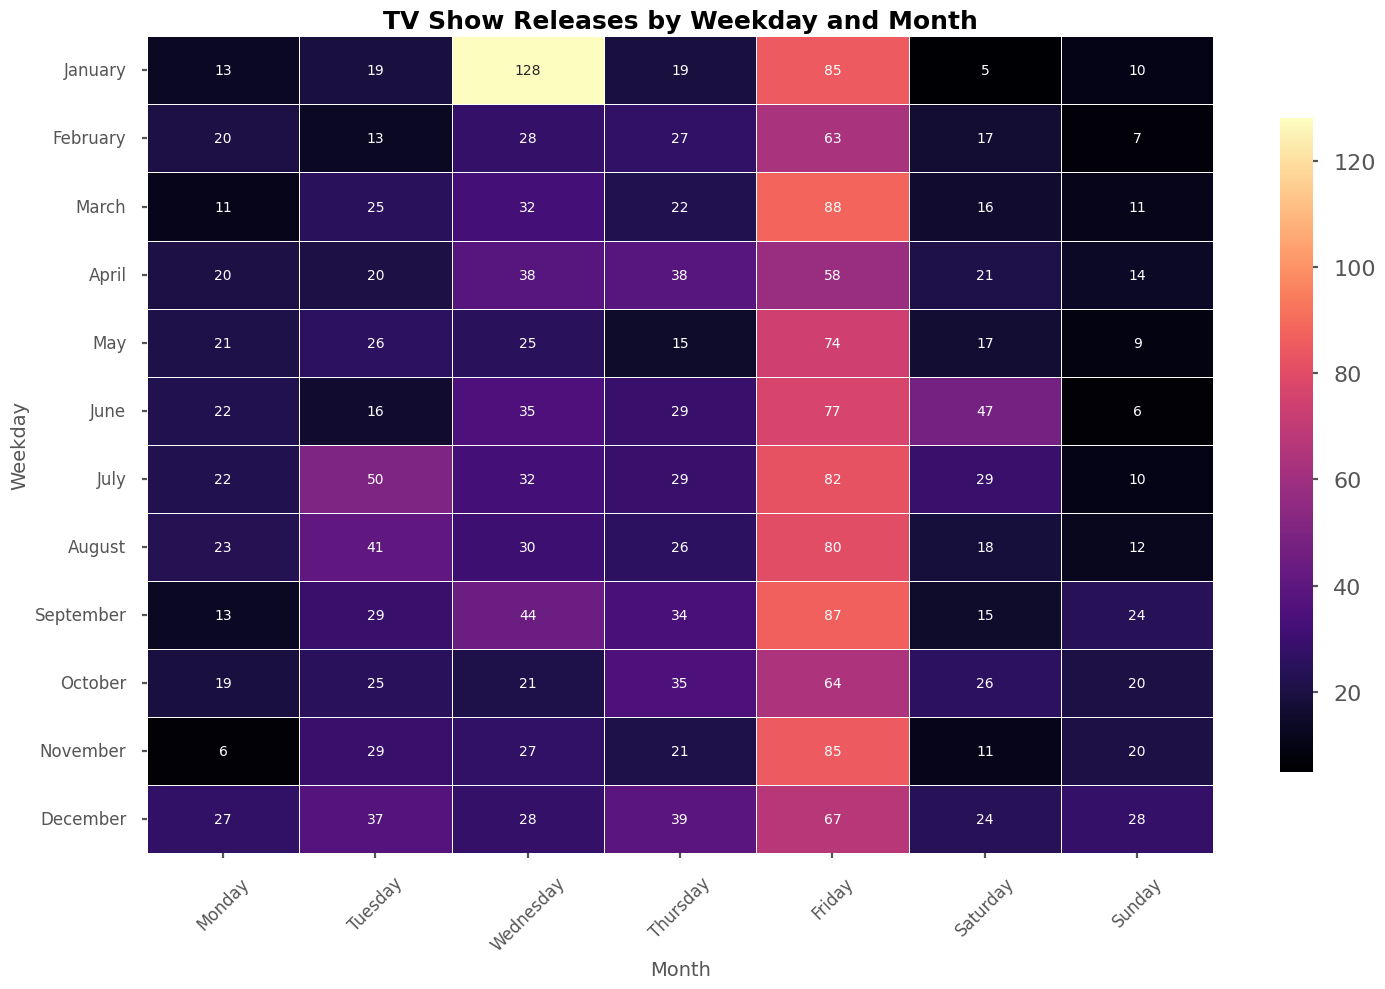

In [115]:
plt.figure(figsize=(15, 10))

sns.heatmap(tvs_release_pivot, cmap='magma', annot=True,
            fmt='d', linewidth=0.5, cbar_kws={"shrink": 0.8})

plt.title("TV Show Releases by Weekday and Month", fontsize=18, fontweight='bold')
plt.xlabel("Month", fontsize=14)
plt.ylabel("Weekday", fontsize=14)

plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=0)

plt.tight_layout()
plt.show()


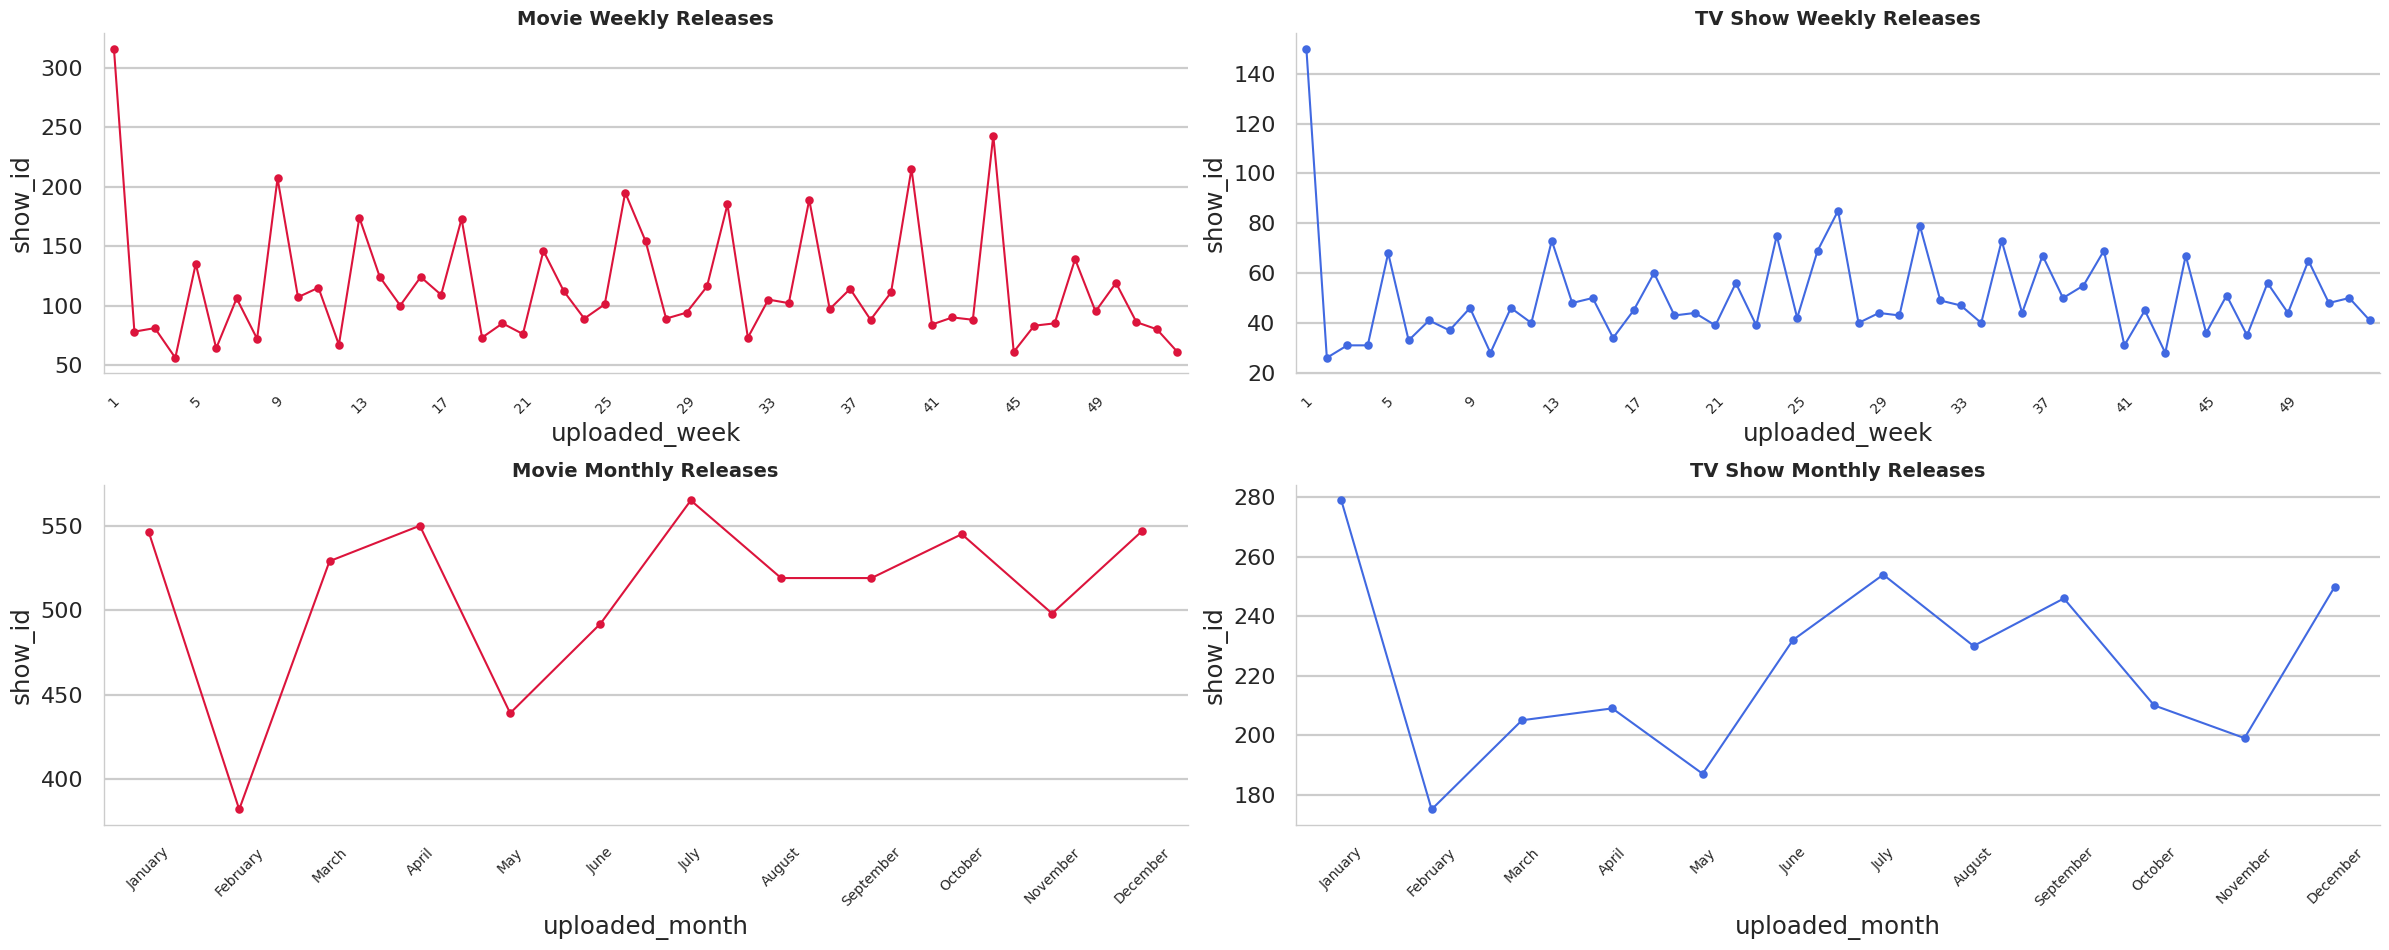

In [116]:
sns.set_style("whitegrid")
plt.figure(figsize=(24, 10), facecolor='white')

plt.subplot(2, 2, 1)
sns.pointplot(data=week_movie_release, x='uploaded_week', y='show_id',
              color="crimson", linewidth=1.5, markersize=5)
plt.title('Movie Weekly Releases', fontsize=14, fontweight='bold')

ticks = np.arange(0, 52, 4)
plt.xticks(ticks, fontsize=10, rotation=45)
sns.despine()

plt.subplot(2, 2, 3)
sns.pointplot(data=monthly_movie_release, x='uploaded_month', y='show_id',
              color="crimson", linewidth=1.5, markersize=5)
plt.title('Movie Monthly Releases', fontsize=14, fontweight='bold')

plt.xticks(fontsize=10, rotation=45)
sns.despine()

plt.subplot(2, 2, 2)
sns.pointplot(data=week_release, x='uploaded_week', y='show_id',
              color="royalblue", linewidth=1.5, markersize=5)
plt.title('TV Show Weekly Releases', fontsize=14, fontweight='bold')

plt.xticks(ticks, fontsize=10, rotation=45)
sns.despine()

plt.subplot(2, 2, 4)
sns.pointplot(data=month_release, x='uploaded_month', y='show_id',
              color="royalblue", linewidth=1.5, markersize=5)
plt.title('TV Show Monthly Releases', fontsize=14, fontweight='bold')

plt.xticks(fontsize=10, rotation=45)
sns.despine()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#### 👉Insights :

Movies
- Friday of every Week,Month throughout the year, has peaked stating that weekends are great time for movie releases.

- July, October, April have topped at releasing because of the holidays.

- December & January also have recorded high releases on holidays.

TV Shows

- Wednesday , Thrusday and Friday seems to be good days releasing new Tv Shows.

- July,September, December, January are also having a higher than average TvShow releases.
--------------------------------

## **Business Proposal: Strategic Recommendations for Netflix Growth**

**Introduction**  
Netflix has established itself as a global leader in the streaming industry, offering a vast content library and innovative viewing experiences.  

However, with increasing competition from platforms such as Disney+, Amazon Prime, and HBO Max, it is essential for Netflix to continually evolve.  

This proposal outlines key strategic recommendations that will help Netflix attract new subscribers, enhance engagement, and maintain its competitive edge.  

---

**1. Expanding Family-Friendly Content**

- While Netflix primarily caters to mature and teenage audiences, increasing family-friendly options (**TV-PG, G-rated content**) can expand its subscriber base.  
- Investment in **animated films and educational series** will attract parents and younger viewers.  

---

**2. Balancing Movie and TV Show Offerings**  

- Netflix’s content library consists of approximately **70% movies and 30% TV shows**.  
- Increasing high-quality **TV series, particularly limited series (1-3 seasons)**, will enhance viewer engagement and retention.  

---

**3. Strengthening Global Content Strategy**  

- With major content-producing countries being the **U.S., U.K., India, Canada, Japan, and South Korea**, Netflix should continue investing in international productions.  
- Expanding **Asian content**, especially localized productions in **Japan and South Korea**, will tap into growing audiences.  
- Strengthen partnerships with **regional film industries** for unique storytelling opportunities.  

---

**4. Optimizing Release Strategy for Maximum Engagement**  

- Maintain **movie releases on Fridays** to capitalize on weekend viewership.  
- Continue **TV show releases on Wednesdays, Thursdays, and Fridays** for peak audience engagement.  
- Focus content releases around high-traffic months (**July, October, December, January**) to leverage holiday streaming trends.  

---

**5. Investing in Popular Genres**  

- **Drama, Comedy, Crime, and Documentaries** are in high demand across both movies and TV shows.  
- Increase investment in **crime-thriller series** and **comedy specials** to sustain audience interest.  

---

**6. Leveraging Data for Ideal Movie Runtime and TV Show Length**  

- Most successful movies fall within the **90-100 minute range**, aligning new productions with this format for optimal engagement.  
- **Shorter TV series (1-3 seasons)** align with viewer preferences and reduce content fatigue.  

---

**7. Collaborating with High-Profile Actors and Directors**  

- Actors such as **Anupam Kher, Shah Rukh Khan, and Takahiro Sakurai** have significant appeal.  
- Strengthening collaborations with top directors like **Rajiv Chilaka (movies) and Ken Burns (TV shows)** can attract a larger audience.  

---

**8. Strengthening Older Content Library**  

- A significant portion of Netflix’s content comes from **2017-2018**, with fewer older films.  
- Acquiring **classic films and TV series from before 2010** can cater to nostalgia-driven audiences.  

---

**9. Experimenting with Limited Releases for Nostalgic Content**  

- Offering **older movies and TV shows as limited-time exclusives** can create urgency and attract older audiences.  

---

**10. Enhancing Regional Pricing & Subscription Models**  

- Introduce **region-specific pricing** to attract price-sensitive markets such as **India, Southeast Asia, and Latin America**.  
- Expand **mobile-only and ad-supported subscription plans** to increase accessibility and affordability.  

---

**11. Leveraging AI & Personalization for Better User Engagement**  

- Utilize **AI-driven recommendations** to enhance personalized content discovery.  
- Introduce **interactive content similar to Bandersnatch** to create immersive experiences.  

---

**Conclusion**  

While Netflix is already a market leader, there is always room for improvement.  

By implementing these strategic recommendations, Netflix can continue growing, attract new subscribers, solidify its current success and also unlock new opportunities for expansion and innovation.


In [117]:
def colab2pdf():
  # @title Download Notebook in PDF Format{display-mode:'form'}
  !apt-get install -yqq --no-install-recommends librsvg2-bin>/dev/null;
  import contextlib,datetime,google,io,IPython,ipywidgets,json,locale,nbformat,os,pathlib,requests,urllib,warnings,werkzeug,yaml,re;locale.setlocale(locale.LC_ALL,'en_US.UTF-8');warnings.filterwarnings('ignore',category=nbformat.validator.MissingIDFieldWarning);
  %matplotlib inline
  def convert(b):
    try:
      s.value='🔄 Converting';b.disabled=True
      n=pathlib.Path(werkzeug.utils.secure_filename(urllib.parse.unquote(requests.get(f'http://{os.environ["COLAB_JUPYTER_IP"]}:{os.environ["KMP_TARGET_PORT"]}/api/sessions').json()[0]['name'])))
      p=pathlib.Path('/content/pdfs')/f'{datetime.datetime.utcnow().strftime("%Y%m%d_%H%M%S")}_{n.stem}';p.mkdir(parents=True,exist_ok=True);nb=nbformat.reads(json.dumps(google.colab._message.blocking_request('get_ipynb',timeout_sec=600)['ipynb']),as_version=4)
      u=[u for c in nb.cells if c.get('cell_type')=='markdown' for u in re.findall(r'!\[.*?\]\((https?://.*?)\)',c['source']) if requests.head(u,timeout=5).status_code!=200]
      if u:raise Exception(f"Bad Image URLs: {','.join(u)}")
      nb.cells=[cell for cell in nb.cells if '--Colab2PDF' not in cell.source]
      nb=nbformat.v4.new_notebook(cells=nb.cells or [nbformat.v4.new_code_cell('#')]);nbformat.validator.normalize(nb)
      nbformat.write(nb,(p/f'{n.stem}.ipynb').open('w',encoding='utf-8'))
      with (p/'config.yml').open('w', encoding='utf-8') as f: yaml.dump({'include-in-header':[{'text':r'\usepackage{fvextra}\DefineVerbatimEnvironment{Highlighting}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines,breakanywhere,commandchars=\\\{\}}'}],'include-before-body':[{'text':r'\DefineVerbatimEnvironment{verbatim}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines}'}]},f)
      !quarto render {p}/{n.stem}.ipynb --metadata-file={p}/config.yml --to pdf -M latex-auto-install -M margin-top=1in -M margin-bottom=1in -M margin-left=1in -M margin-right=1in --quiet
      google.colab.files.download(str(p/f'{n.stem}.pdf'));s.value=f'✅ Downloaded: {n.stem}.pdf'
    except Exception as e:s.value=f'❌ {str(e)}'
    finally:b.disabled=False
  if not pathlib.Path('/usr/local/bin/quarto').exists():
    !wget -q 'https://quarto.org/download/latest/quarto-linux-amd64.deb' && dpkg -i quarto-linux-amd64.deb>/dev/null && quarto install tinytex --update-path --quiet && rm quarto-linux-amd64.deb
  b=ipywidgets.widgets.Button(description='⬇️ Download');s=ipywidgets.widgets.Label();b.on_click(lambda b:convert(b));IPython.display.display(ipywidgets.widgets.HBox([b,s]))
colab2pdf() # | Colab2PDF v1.6 | https://github.com/drengskapur/colab2pdf | GPL-3.0-or-later |